# import

In [1]:
from astropy.io import fits
import time
#import urllib2# python2
import urllib#python3

import datetime
#from itertools import ifilter python2
from collections import Counter, defaultdict
import xml.etree.ElementTree as ET
import h5py
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
#import bibtexparser
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord

pd.set_option('mode.chained_assignment','warn')

In [380]:
from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astropy import constants 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import cm

import os
from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [3]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [4]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [5]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)

In [6]:
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular
from collections import Counter

In [7]:
from astropy.table import Table

## linerfit

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

In [9]:
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling import models,fitting
from astropy.modeling.models import custom_model
from scipy.optimize import least_squares,curve_fit
from scipy.stats import f
import os

def linear(x,k,b):#linear
    return k*x+b

def broken_linear_curve(x,k1,k2,x0,b1,b2):#two lines divided by x0
    return np.where(x<x0,k1*x+b1,k2*x+b2)    

def broken_linear_curve_dot(x,k1,k2,x0,y0):#connect by x0,y0
    return np.where(x<x0,k1*(x-x0)+y0,k2*(x-x0)+y0) 

def power_law(x,S0,alpha):
    return S0*x**alpha



def alpha_calc(x,y):
    popt,pcov=curve_fit(power_law,x,y,p0=(10,0.5))
    S0=popt[0]
    alpha=popt[1]
    alpha_err=np.sqrt(np.diag(pcov))[1]
    return S0,alpha,alpha_err

def linear_calc(x,y):#linear_parameter
    popt,pcov=curve_fit(linear,x,y,p0=(1,1))
    return popt[0],popt[1]

def broken_linear_curve_calc(x,y):
    param_bounds=([-np.inf,0,-4,-np.inf,-np.inf],[-0,np.inf,-2.5,np.inf,np.inf])
    popt,pcov=curve_fit(broken_linear_curve,x,y,p0=(-1.5,1.5,-2.7,2,-1.5),bounds=param_bounds)
    k1=popt[0]
    k2=popt[1]
    x0=popt[2]
    b1=popt[3]
    b2=popt[4]
    return k1,k2,x0,b1,b2

def broken_linear_curve_dot_calc(x,y):
    param_bounds=([-np.inf,0,-3.5,0],[0,np.inf,-2.5,2])
    popt,pcov=curve_fit(broken_linear_curve_dot,x,y,p0=(-1.5,1.5,-2.7,1),bounds=param_bounds)
    k1=popt[0]
    k2=popt[1]
    x0=popt[2]
    y0=popt[3]
    return k1,k2,x0,y0


def decay_e_timescale(t,tau,S0):
    logey=-t/tau+S0
    return logey
#logy=-(x-x[0])/tau+S0

def decay_e_timescale_calc(x,y,tau_test=1000,S0_test=1):
    logey=np.log(y)
    param_bounds=([0,-np.inf],[np.inf,np.inf])
    popt,pcov=curve_fit(decay_e_timescale,x,logey,p0=(tau_test,S0_test),bounds=param_bounds)
    tau=popt[0]
    S0=popt[1]    
    return tau,S0


def exp_timescale(t,Tr,Tf,tp,S0):
    logey=-(np.exp((tp-t)/Tr)+np.exp((t-tp)/Tf))+S0
    return logey


def exp_timescale_calc(x,y,Tr_test=10000,Tf_test=2000,tp_test=50000,S0_test=1):
    logey=np.log(y)
    param_bounds=([1,1,45700,-np.inf],[np.inf,np.inf,58300,np.inf])
    popt,pcov=curve_fit(exp_timescale,x,logey,p0=(Tr_test,Tf_test,tp_test,S0_test),bounds=param_bounds)
    Tr=popt[0]
    Tf=popt[1]
    tp=popt[2] 
    S0=popt[3]    
    return Tr,Tf,tp,S0


## def alpha_calc_2freq_2logflux

In [10]:
def alpha_calc_2freq_2logflux(freq1,freq2,logflux1,logflux2):    
    #Get lightcurve values
    
    alpha= (logflux1-logflux2)/(np.log10(freq2)-np.log10(freq1))
    
    return alpha

In [67]:
import sys
#!{sys.executable} -m pip install package

In [68]:
{sys.executable}

{'/Users/lyubing/opt/anaconda3/bin/python3'}

# Surveyfits_path


In [117]:
Surveyfits_root='/Volumes/ExtremeSSD/Survey_fits/'

In [11]:
Surveyfits_path='/Volumes/ExtremeSSD/Survey_fits/Survey_fits/Survey_fits'

# 3C 3CRR

In [12]:
sample_3Cdir='/Volumes/ExtremeSSD/Survey_fits/3CR/3Csample'

## 3CR

In [185]:
p3CR_V=pd.read_excel('%s/3CR.xlsx'%sample_3Cdir,sheet_name='工作表1')

p3CR_IV=pd.read_excel('%s/3CR.xlsx'%sample_3Cdir,sheet_name='工作表2')

p3CR_III=pd.read_excel('%s/3CR.xlsx'%sample_3Cdir,sheet_name='工作表3')

p3CR_II=pd.read_excel('%s/3CR.xlsx'%sample_3Cdir,sheet_name='工作表4')

## 3CRR

In [13]:
p3CRR=pd.read_csv('%s/3CRR_table_ascii.txt'%sample_3Cdir,header=0,delimiter='\s+')
p3CRR_NED=pd.read_csv('%s/3CRR_NED.py'%sample_3Cdir,header=None,delimiter='|')
p3CRR_NED.columns=['index','1','Name','*','Ned_name','ra','dec','class','z','z_qual','index0']

Coord_p3CRR_NED = SkyCoord(p3CRR_NED['ra'], p3CRR_NED['dec'], frame="icrs",) 

p3CRR_NED['ra_deg']=Coord_p3CRR_NED.ra.deg
p3CRR_NED['dec_deg']=Coord_p3CRR_NED.dec.deg

In [14]:
p3CRR_NEDX = np.empty((len(p3CRR_NED), 2), dtype=np.float64)
p3CRR_NEDX[:, 0] = p3CRR_NED['ra_deg']
p3CRR_NEDX[:, 1] = p3CRR_NED['dec_deg']

In [15]:
p3CRR.columns

Index(['3CRR_name', 'IAU_name', 'Redshift', '178-MHz_flux', 'Sp.index',
       'FR_class', '5-GHz_core_flux', '`Best'_radio_map'],
      dtype='object')

In [16]:
p3CRR_OIII=pd.read_excel('%s/3CRROIIIdata.xlsx'%sample_3Cdir,sheet_name='Sheet1')

In [ ]:
p3CRR_OIII

In [ ]:
p3CRR_OIII.columns

L_151 L_[OIII]
4C12.03
3C6.1
3C16
3C20
3C31
3C35
3C42
3C43
3C55
3C66B
3C76.1
3C83.1B
4C14.11
3C123
3C173.1
DA240
3C196
4C14.27
3C216
3C219
3C228
3C236
4C74.16
3C264
3C268.1
A1552
3C274
3C274.1
3C285
3C289
3C295
3C296
3C305
3C315
3C319
3C322
3C326
3C337
3C338
NGC6251
3C346
3C349
3C386
3C388
3C401
3C433
3C436
3C438
3C449
NGC7385
3C465
3C470
6C0822+3434
6C0824+3535
6C0905+3955
6C0913+3907
6C0930+3855
6C1016+3637
6C1113+3458
6C1148+3638
6C1213+3504
6C1217+3645
5C6.43
5C6.63
5C6.201
5C6.214
5C6.233
5C6.402
5C7.70
5C7.79
5C7.106
5C7.145
5C7.170
5C7.178
5C7.312a
5C7.312c


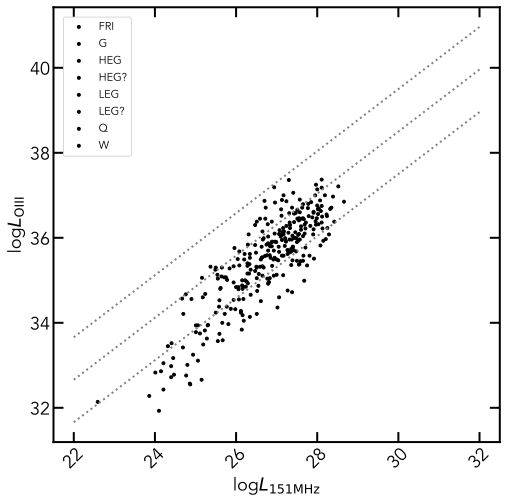

In [14]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


#ax.hist(BAT_105m_Seyfert_data_1['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',ec='red', fc='red',label='Type1',linestyle='-.')

#ax.axvline(np.mean(BAT_105m_Seyfert_data_1['sigma_m_w1_neo']),color='red',ls=':')

log_L200=np.linspace(22,32,10)
y_log_L200=0.73*log_L200+16.6
ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)
delta_yLOIII=1.0

#p3CR
plotdata=p3CRR_OIII
column_x=4
column_y=5
column_label=1

print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    name_class=plotdata.loc[i,plotdata.columns[column_label]] 
    
    if isinstance(plotdata[plotdata.columns[column_x]][i],(int,float)) and isinstance(plotdata[plotdata.columns[column_y]][i],(int,float)):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='.',label=name_class.strip())
        
        if plotdata[plotdata.columns[column_x]][i]*0.73+16.6-plotdata[plotdata.columns[column_y]][i]>delta_yLOIII:
            print(plotdata['Name'][i])
'''            ax.text(
                    plotdata[plotdata.columns[column_x]][i],
                    plotdata[plotdata.columns[column_y]][i],
                    plotdata['Name'][i],
            
            )'''

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'log$ L_\mathrm{ 151MHz}$')
ax.set_ylabel(r'log$L_\mathrm{OIII}$')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars

#hdl = [h[0] for h in handles]
hdl=handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(0.0,0.6)
#plt.legend()
fig.savefig('3CRR_cat_LOIII_Lradio.png', dpi=100, transparent=False, bbox_inches='tight')


## p3CRR_withdistance

In [17]:
p3CRR_distance=p3CRR[p3CRR['5-GHz_core_flux'].str.contains('<')==False]
p3CRR_distance=p3CRR_distance[p3CRR_distance['5-GHz_core_flux'].str.contains('--')==False]
p3CRR_distance=drop_index(p3CRR_distance)

In [18]:
len(p3CRR_distance),len(p3CRR)

(151, 173)

In [20]:
for i in range(len(p3CRR_distance)):
     p3CRR_distance.loc[i,'5GHz_flux_Jy']=float(p3CRR_distance.loc[i,'5-GHz_core_flux'])*1.0e-3
        
p3CRR_distance['D_cm']=cosmo.luminosity_distance(z=p3CRR_distance['Redshift'].values).to(u.cm).value
p3CRR_distance['L178MHz']=p3CRR_distance['178-MHz_flux']*4*np.pi*p3CRR_distance['D_cm']**2*1.0e-23
p3CRR_distance['logL178MHz']=np.log10(p3CRR_distance['L178MHz'])

p3CRR_distance['L5GHz']=p3CRR_distance['5GHz_flux_Jy']*4*np.pi*p3CRR_distance['D_cm']**2*1.0e-23
p3CRR_distance['logL5GHz']=np.log10(p3CRR_distance['L5GHz'])

        

In [52]:
p3CRR_distance.columns

Index(['3CRR_name', 'IAU_name', 'Redshift', '178-MHz_flux', 'Sp.index',
       'FR_class', '5-GHz_core_flux', '`Best'_radio_map', '5GHz_flux_Jy',
       'D_cm', 'L178MHz', 'logL178MHz', 'L5GHz', 'logL5GHz', 'alpha'],
      dtype='object')

In [21]:
for i in range(len(p3CRR_distance)):
    freq1=5e9
    freq2=178e6
    logflux1=p3CRR_distance.loc[i,'logL5GHz']
    logflux2=p3CRR_distance.loc[i,'logL178MHz']
    
    p3CRR_distance.loc[i,'alpha']=alpha_calc_2freq_2logflux(freq1,freq2,logflux1,logflux2)

In [36]:
p3CRR_distance.columns

Index(['3CRR_name', 'IAU_name', 'Redshift', '178-MHz_flux', 'Sp.index',
       'FR_class', '5-GHz_core_flux', '`Best'_radio_map', '5GHz_flux_Jy',
       'D_cm', 'L178MHz', 'logL178MHz', 'L5GHz', 'logL5GHz', 'alpha'],
      dtype='object')

## alpha_vs_spectral_index

Sp.index alpha


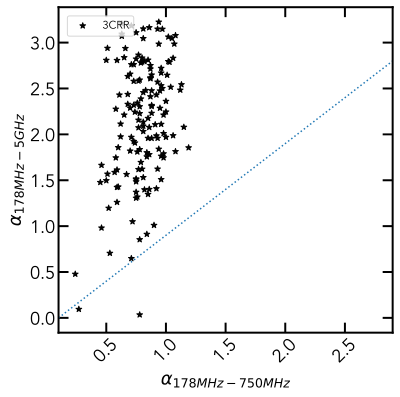

In [94]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

#ax.hist(BAT_105m_Seyfert_data_1['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',ec='red', fc='red',label='Type1',linestyle='-.')

#ax.axvline(np.mean(BAT_105m_Seyfert_data_1['sigma_m_w1_neo']),color='red',ls=':')

#p3CR
plotdata=p3CRR_distance
column_x=4
column_y=14
print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='*',label='3CRR')
        
set_ax_tick(ax)
ax.set_xlim(0.1,2.9)
ax.plot(np.linspace(0.1,3.1,10),np.linspace(0,3,10),ls=':')
#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_ylabel(r'$\alpha_{178MHz-5GHz}$')
ax.set_xlabel(r'$\alpha_{178MHz-750MHz}$')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)        
        

In [55]:
np.mean(p3CRR_distance['Sp.index']),np.std(p3CRR_distance['Sp.index'])

(0.7976821192052977, 0.17875375681175742)

In [56]:
np.mean(p3CRR_distance['alpha']),np.std(p3CRR_distance['alpha'])

(2.135397887219527, 0.6793372891480793)

## clip

In [ ]:
p3CRR_OIII.columns

In [23]:
p3CRR_OIII['select']=0
for index, i in enumerate(p3CRR_OIII['L_[OIII]']):
    if isinstance(p3CRR_OIII['L_[OIII]'][index],(int,float)) and isinstance(p3CRR_OIII['L_151'][index],(int,float)):
        p3CRR_OIII.loc[index,'select']=1                

p3CRR_OIII_float=p3CRR_OIII.select_dtypes(include='number')

In [ ]:
p3CRR_OIII

In [24]:
p3CRR_OIII_float=p3CRR_OIII[p3CRR_OIII['select']==1]
#p3CRR_OIII_float=p3CRR_OIII_float[p3CRR_OIII_float['L_[OIII]'].str.contains('<')==False]
#p3CRR_OIII_float=p3CRR_OIII_float[p3CRR_OIII_float['L_151'].str.contains('<')==False]
#p3CRR_OIII_float=p3CRR_OIII_float[p3CRR_OIII_float['L_151'].str.contains('>')==False]
p3CRR_OIII_float=drop_index(p3CRR_OIII_float)

In [25]:
len(p3CRR_OIII_float),len(p3CRR_OIII)

(300, 301)

In [26]:
p3CRR_OIII_float['L_151'].dtype

dtype('float64')

p3CRR_OIII_float['L_[OIII]'].astype(float)

In [27]:
dataplot=p3CRR_OIII_float

x=np.array(dataplot['L_151']).astype(float)
y=np.array(dataplot['L_[OIII]']).astype(float)
#x= np.log10(dataplot['L200MHz']) #log
#y= np.log10(dataplot['oiii_5007_Lum'])#log
#xerr= dataplot['L200MHz_err']/np.log(10)/x
#yerr= dataplot['oiii_5007_Lum_err']/np.log(10)/y

weights=np.zeros(len(x))+1

#xerr

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=2.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/weights)
filtered_data = np.ma.masked_array(y, mask=mask)

print(fitted_line)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ------------------ ------------------
    0.9251819090106748 10.734868897538995


In [28]:
fitted_line.slope.value,fitted_line.intercept.value

(0.9251819090106748, 10.734868897538995)

In [29]:
len(mask),len(x),np.sum(mask)

(300, 300, 63)

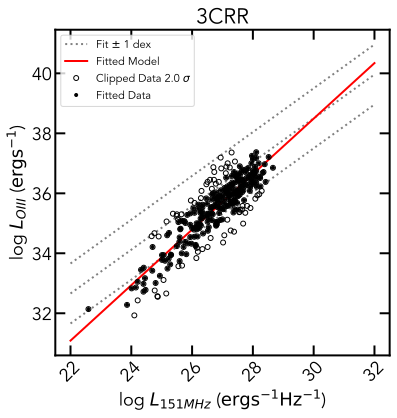

In [30]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

log_L200=np.linspace(22,32,10)
y_log_L200=0.73*log_L200+16.6


sigma=2.0

ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fit $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

ax.errorbar(x, y, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k.", fillstyle="none", label=r"Clipped Data %.1f $\sigma$"%sigma)

ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{151MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('3CRR')

#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.legend(fontsize=11.)
#plt.show()
fig.savefig('3CRR_cat_LOIII_Lradio_clip_%s_sigma.png'%sigma, dpi=100, transparent=False, bbox_inches='tight')
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=400, transparent=False, bbox_inches='tight')


## select fading

1 3C6.1 Fading

7 3C20 Fading

14 3C35 Fading

17 3C43 Fading
22 3C55 Fading

36 3C123 Fading

43 3C173.1 Fading

50 DA240 Fading

54 3C196 Fading

74 3C236 Fading

76 4C74.16 Fading

90 3C268.1 Fading

97 3C274.1 Fading

106 3C289 Fading

110 3C295 Fading

121 3C319 Fading
123 3C322 Fading

131 3C337 Fading

137 NGC6251 Fading

149 3C386 Fading

150 3C388 Fading

152 3C401 Fading

155 3C433 Fading

158 3C438 Fading

167 3C465 Fading

169 3C470 Fading

173 6C0824+3535 Fading
185 6C0930+3855 Fading
202 6C1113+3458 Fading
236 5C6.43 Fading
273 5C7.70 Fading
286 5C7.178 Fading
297 5C7.312c Fading


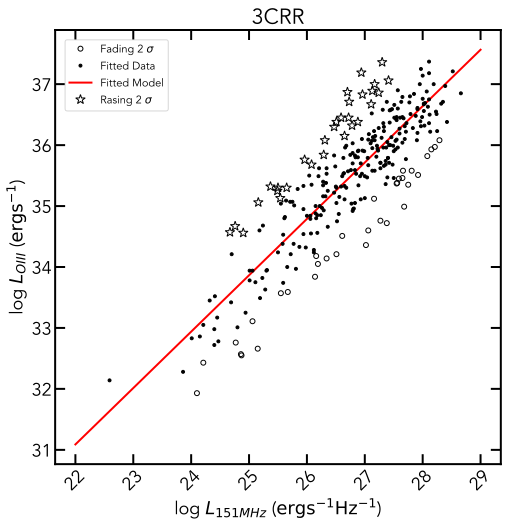

In [33]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

log_L200=np.linspace(22,29,10)
y_log_L200=0.73*log_L200+16.6

ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

for index, (name,x_,y_,mask_) in enumerate(zip(p3CRR_OIII_float['Name'].values,x,y,mask)):
    if mask_:
        if x_*fitted_line.slope.value+fitted_line.intercept.value>y_:
            print(index,name,'Fading')
            p3CRR_selectFading=p3CRR_distance[p3CRR_distance['3CRR_name']==name]           
            
            if len(p3CRR_selectFading)>0:
                #p3CRR_selectFading=drop_index(p3CRR_selectFading)
                #print(p3CRR_selectFading.loc[0,'alpha'],p3CRR_selectFading.loc[0,'Sp.index'])
                print()
            
            ax.errorbar(x_, y_, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k.", fillstyle="none", label=r"Fading 2 $\sigma$")

        else:
            #print(name,'Rasing')
            ax.errorbar(x_, y_, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k*", fillstyle="none", label=r"Rasing 2 $\sigma$")            
            
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{151MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('3CRR')

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.legend(fontsize=11.)
#plt.show()
fig.savefig('3CRR_cat_LOIII_Lradio_clip_%s_sigma_fading.png'%sigma, dpi=100, transparent=False, bbox_inches='tight')
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=400, transparent=False, bbox_inches='tight')
            

# SDSS_RG_18286

In [34]:
SDSS_RG_dir='/Volumes/ExtremeSSD/Survey_fits/Survey_fits/Survey_fits/AGN/On the fundamental dichotomy in the local radio-AGN population accretion, evolution and host galaxy properties. (2012)/Properties of 18286 SDSS radio galaxies/J_MNRAS_421_1569/'
SDSS_RG_18286=Table.read('%s/table1.dat'%SDSS_RG_dir,readme='%s/ReadMe'%SDSS_RG_dir,format='ascii.cds')

SDSS_RG_18286['RAdeg'] = SDSS_RG_18286['RAhour']*15.0




In [105]:
SDSS_RG_18286.colnames

['Plate',
 'MJD',
 'Fiber',
 'RAhour',
 'DEdeg',
 'z',
 'SNVSS',
 'RCl',
 'SFIRST',
 'Offset',
 'A',
 'M',
 'L',
 'H',
 'RAdeg']

## SDSS_RG_18286_specid

In [35]:
SDSS_RG_18286_specid_path='/Volumes/ExtremeSSD/Survey_fits/MyTable_Radiogalaxies_brettlv.csv'

In [36]:
SDSS_RG_18286_specid=pd.read_csv(SDSS_RG_18286_specid_path,header=0)

In [108]:
SDSS_RG_18286_specid

,plate1,mjd1,fiber1,plate2,mjd2,fiber2,specobjid
0,266,51602,5,266,51602,5,75093972728414208
1,266,51602,5,266,51602,5,75093972728414208
2,266,51602,26,266,51602,26,75093972816494592
3,266,51602,26,266,51602,26,75093972816494592
4,266,51602,100,266,51602,100,75093973126873088
...,...,...,...,...,...,...,...
36567,2974,54592,456,2974,54592,456,837341053504716800
36568,2974,54592,589,2974,54592,589,837341054062559232
36569,2974,54592,589,2974,54592,589,837341054062559232
36570,2974,54592,595,2974,54592,595,837341054087725056


for index,specid in enumerate(SDSS_RG_18286_specid['specobjid']):
    if specid in SDSS_galaxies_emission_line['specObjId']:
        print(index,specid)

# SDSS_galaxies_emission_line

In [38]:
SDSS_galaxies_emission_line_path='/Volumes/ExtremeSSD/Survey_fits/MyTable_galaxies_emission_line.csv'

In [39]:
SDSS_galaxies_emission_line=pd.read_csv(SDSS_galaxies_emission_line_path,header=0)
SDSS_galaxies_array=SDSS_galaxies_emission_line.to_records()

In [ ]:
len(SDSS_galaxies_emission_line)

In [ ]:
SDSS_galaxies_emission_line[:1]

In [107]:
SDSS_galaxies_emission_line.columns

Index(['plate', 'fiberid', 'mjd', 'z', 'zwarning', 'ra', 'dec', 'specObjId',
       'h_beta_flux', 'h_beta_flux_err', 'h_alpha_flux', 'h_alpha_flux_err',
       'oiii_5007_flux', 'oiii_5007_flux_err'],
      dtype='object')

In [ ]:
SDSS_galaxies_array.dtype.names

In [ ]:
00 20 50.6707266504  +27 44 40.212376512

# SDSS J135445.66+002050.2

In [ ]:
SkyCoord(ra='00h20m50.6707266504s', dec='+27d44m40.212376512s', frame="icrs",) 

## Unit

1e-17 erg/s/cm^2

In [ ]:
dataplot=SDSS_galaxies_emission_line[:100]

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


ax.errorbar(dataplot['h_alpha_flux'],dataplot['h_beta_flux'],
            xerr=dataplot['h_alpha_flux_err'],
            yerr=dataplot['h_beta_flux_err'],
             fmt="ko", fillstyle="none",
            )
ax.semilogx()
ax.semilogy()
plt.xlabel(r'H$\alpha$')
plt.ylabel(r'H$\beta$')
plt.show

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

ax.errorbar(dataplot['h_alpha_flux'],dataplot['oiii_5007_flux'],
            xerr=dataplot['h_alpha_flux_err'],
            yerr=dataplot['oiii_5007_flux_err'],
             fmt="ko", fillstyle="none",
            )


ax.semilogx()
ax.semilogy()
plt.xlabel(r'H$\alpha$')
plt.ylabel(r'O$_{III}$')
plt.show





In [ ]:
a=0.1*np.e**0.1
b=1/9
c=-np.log10(0.9)

In [ ]:
print(a,b,c)

# TGSS

In [ ]:
We present the first full release of a survey of the 150MHz radio
    sky, observed with the Giant Metrewave Radio Telescope (GMRT) between
    April 2010 and March 2012 as part of the TIFR GMRT Sky Survey (TGSS)
    project. 
    
The majority of pointing images have a noise level below 5mJy/beam with an
    approximate resolution of 25"x25" (or 25"x25"/cos(Dec-19{deg}) for
    pointings south of 19{deg} declination).    

In [40]:
TGSS_dir='%s/TGSS ADR1 The GMRT 150MHz all-sky radio survey/J_A+A_598_A78'%Surveyfits_path #mJy/beam
TGSSdata=Table.read('%s/table3.dat'%TGSS_dir,readme='%s/ReadMe'%TGSS_dir,format='ascii.cds')

In [64]:
TGSSdata.colnames

['TGSSADR',
 'RAdeg',
 'e_RAdeg',
 'DEdeg',
 'e_DEdeg',
 'Stotal',
 'e_Stotal',
 'Speak',
 'e_Speak',
 'Maj',
 'e_Maj',
 'Min',
 'e_Min',
 'PA',
 'e_PA',
 'Noise',
 'Code',
 'Mosaic']

# LoTSS

The LOw-Frequency ARray (LOFAR) Two-metre Sky Survey (LoTSS) Second
    data release contains 120-168MHz images covering 27% of the northern
    sky. The coverage is split into two regions centred at approximately
    12h45m +44{deg}30' and 1h00m +28{deg}00' and spanning 4178 and 1457
    square degrees respectively. A catalogue of 4396228 radio components
    is derived from our 6" resolution total intensity (Stokes I) maps
    where the median rms sensitivity is 83uJy/beam; the flux density scale
    accuracy is approximately 10%; 

In [41]:
LoTSS_dir='%s/LOFAR Two-metre Sky Survey (LoTSS) DR2/J_A+A_659_A1'%Surveyfits_path #mJy
LoTSSdata=Table.read('%s/catalog.dat'%LoTSS_dir,readme='%s/ReadMe'%LoTSS_dir,format='ascii.cds')

# GLEAM

200 MHz

In [42]:
gleam=fits.open('%s/GLEAM/GLEAM_EGC_v2.fits'%Surveyfits_path)
gleamdata=gleam[1].data

GGSM=fits.open('%s/GLEAM/GGSM.fits'%Surveyfits_path)
GGSMdata=GGSM[1].data #Jy

In [66]:
GGSMdata.columns

ColDefs(
    name = 'Name'; format = '20A'
    name = 'RAJ2000'; format = 'E'
    name = 'DEJ2000'; format = 'E'
    name = 'S_200'; format = 'D'
    name = 'alpha'; format = 'D'
    name = 'beta'; format = 'D'
    name = 'a'; format = 'E'
    name = 'b'; format = 'E'
    name = 'pa'; format = 'E'
)

# WISE_AGN_cat

In [226]:
WISE_AGN_cat=fits.open('%s/AGN/The WISE AGN candidates catalogs/J_ApJS_234_23_r90cat.dat.gz.fits'%Surveyfits_path)

# Crossmatch

## X

In [43]:
SDSS_RG_18286X = np.empty((len(SDSS_RG_18286), 2), dtype=np.float64)
SDSS_RG_18286X[:, 0] = SDSS_RG_18286['RAhour']*15.0
SDSS_RG_18286X[:, 1] = SDSS_RG_18286['DEdeg']

In [ ]:
SDSS_galaxies_emission_line.head()#.columns

In [44]:
SDSS_galaxies_emission_lineX = np.empty((len(SDSS_galaxies_emission_line), 2), dtype=np.float64)
SDSS_galaxies_emission_lineX[:, 0] = SDSS_galaxies_emission_line['ra']
SDSS_galaxies_emission_lineX[:, 1] = SDSS_galaxies_emission_line['dec']

SDSS_galaxies_emission_line[:,0]

In [45]:
TGSSX = np.empty((len(TGSSdata), 2), dtype=np.float64)
TGSSX[:, 0] = TGSSdata['RAdeg']
TGSSX[:, 1] = TGSSdata['DEdeg']

In [55]:
gleamX = np.empty((len(gleamdata), 2), dtype=np.float64)
gleamX[:, 0] = gleamdata['RAJ2000']
gleamX[:, 1] = gleamdata['DEJ2000']

GGSMX = np.empty((len(GGSMdata), 2), dtype=np.float64)
GGSMX[:, 0] = GGSMdata['RAJ2000']
GGSMX[:, 1] = GGSMdata['DEJ2000']

LoTSSdata.colnames

In [58]:
LoTSSX = np.empty((len(LoTSSdata), 2), dtype=np.float64)
LoTSSX[:, 0] = LoTSSdata['RAdeg']
LoTSSX[:, 1] = LoTSSdata['DEdeg']

## SDSS_RG_18286X,SDSS_galaxies_emission_lineX

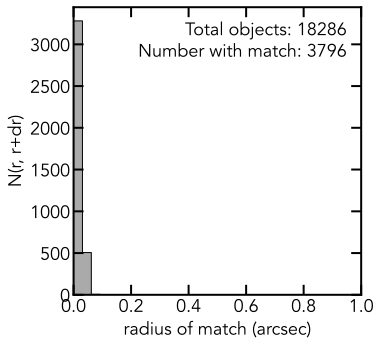

In [46]:
# crossmatch catalogs
max_radius = 1. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(SDSS_RG_18286X,SDSS_galaxies_emission_lineX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (SDSS_RG_18286X.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()


In [47]:
len(match)

18286

In [ ]:
'z',
 'zwarning',
 'ra',
 'dec',
 'specObjId',
 'h_beta_flux',
 'h_beta_flux',
 'h_alpha_flux',
 'h_alpha_flux_err',
 'oiii_5007_flux',
 'oiii_5007_flux_err'

In [49]:
SDSS_RG_18286_match_SDSS_galaxies_emission_line=SDSS_RG_18286[match]
#drop_index()
SDSS_galaxies_emission_line_match_SDSS_RG_18286=SDSS_galaxies_array[ind[match]] 
print(len(SDSS_RG_18286_match_SDSS_galaxies_emission_line),np.sum(match))
print(len(SDSS_galaxies_emission_line_match_SDSS_RG_18286))

3796 3796
3796


In [50]:
SDSS_RG_18286_match_SDSS_galaxies_emission_line['z_']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['z']                                                                                                     
SDSS_RG_18286_match_SDSS_galaxies_emission_line['ra_']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['ra']
                                                                                                     
                                                                                                     
SDSS_RG_18286_match_SDSS_galaxies_emission_line['dec_']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['dec']

SDSS_RG_18286_match_SDSS_galaxies_emission_line['h_alpha_flux']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['h_alpha_flux']
SDSS_RG_18286_match_SDSS_galaxies_emission_line['h_alpha_flux_err']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['h_alpha_flux_err']


SDSS_RG_18286_match_SDSS_galaxies_emission_line['h_beta_flux']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['h_beta_flux']
SDSS_RG_18286_match_SDSS_galaxies_emission_line['h_beta_flux_err']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['h_beta_flux_err']


SDSS_RG_18286_match_SDSS_galaxies_emission_line['oiii_5007_flux']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['oiii_5007_flux']
SDSS_RG_18286_match_SDSS_galaxies_emission_line['oiii_5007_flux_err']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['oiii_5007_flux_err']


In [51]:
len(SDSS_RG_18286_match_SDSS_galaxies_emission_line)

3796

In [52]:
SDSS_RG_18286_match_SDSS_galaxies_emission_line.colnames

['Plate',
 'MJD',
 'Fiber',
 'RAhour',
 'DEdeg',
 'z',
 'SNVSS',
 'RCl',
 'SFIRST',
 'Offset',
 'A',
 'M',
 'L',
 'H',
 'RAdeg',
 'z_',
 'ra_',
 'dec_',
 'h_alpha_flux',
 'h_alpha_flux_err',
 'h_beta_flux',
 'h_beta_flux_err',
 'oiii_5007_flux',
 'oiii_5007_flux_err']

In [54]:
SDSS_RG_18286_match_SDSS_galaxies_emission_line[:5]

Plate,MJD,Fiber,RAhour,DEdeg,z,SNVSS,RCl,SFIRST,Offset,A,M,L,H,RAdeg,z_,ra_,dec_,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err
,,,h,deg,,Jy,,Jy,arcsec,,,,,h,,,,,,,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
266,51602,150,9.758252,-0.36839,0.05302,0.0104,1,0.001,2.02,0,1,0,0,146.37378,0.05290708,146.37378,-0.36838682,737.1107,8.049224,149.5079,4.917249,95.27357,4.747185
266,51602,235,9.7067464,-0.00139,0.14591,0.0054,1,0.0049,0.43,0,1,0,0,145.60119600000002,0.1458226,145.6012,-0.001388682,850.1395,7.674769,109.6307,4.157013,130.8339,4.614863
266,51602,439,9.7200124,0.41417,0.02525,0.0081,3,0.0,--,0,0,0,0,145.800186,0.02524959,145.80019,0.41417226,374.9436,5.602103,70.19812,3.546628,49.28839,3.722379
266,51602,504,9.7641998,0.63871,0.03037,0.0052,1,0.0028,2.09,0,1,0,0,146.462997,0.03032346,146.46299,0.63870908,1473.619,11.88737,317.4383,5.827258,85.59758,4.441088
266,51602,554,9.7871195,0.66564,0.02012,0.018,1,0.0131,0.79,1,1,1,0,146.8067925,0.0200758,146.8068,0.66563514,853.0652,10.24324,156.3904,5.302642,70.22443,5.325087


### RG_OIIIX

In [56]:
RG_OIIIX = np.empty((len(SDSS_RG_18286_match_SDSS_galaxies_emission_line), 2), dtype=np.float64)
RG_OIIIX[:, 0] = SDSS_RG_18286_match_SDSS_galaxies_emission_line['RAdeg']
RG_OIIIX[:, 1] = SDSS_RG_18286_match_SDSS_galaxies_emission_line['DEdeg']

# RG_OIII TGSS

## MatchNwithradius

#crossmatch catalogs
fig = plt.figure(figsize=(4, 4))
#Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

max_radius = np.arange(1,30)*1.0 / 3600  # 1 arcsec
for i in max_radius:
    dist, ind = crossmatch_angular(RG_OIIIX,TGSSX, i)
    match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'
    ax.scatter(i*3600,np.sum(match),color='black')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N')

ax.set_xlim(0, max(max_radius)*3600)
set_ax_tick(ax)
plt.show()
plt.close()

## RG_OIIIX,TGSSX

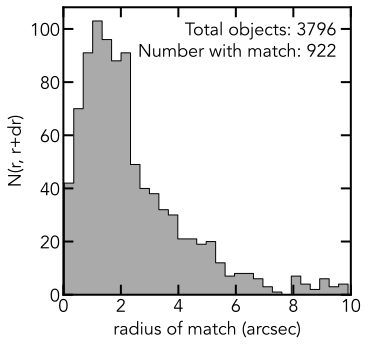

In [142]:
# crossmatch catalogs
max_radius = 10. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(RG_OIIIX,TGSSX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (RG_OIIIX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()
plt.close()

In [144]:
RG_OIII_match_TGSS=SDSS_RG_18286_match_SDSS_galaxies_emission_line[match]
#drop_index()
TGSS_match_RG_OIII=TGSSdata[ind[match]] 

RG_OIII_match_TGSS['F200MHz']=TGSS_match_RG_OIII['Stotal'] #mJy
RG_OIII_match_TGSS['F200MHz_err']=TGSS_match_RG_OIII['e_Stotal']
RG_OIII_match_TGSS['Dcm']=cosmo.luminosity_distance(RG_OIII_match_TGSS['z']).to(u.cm).value

RG_OIII_match_TGSS['L200MHz']=4*np.pi*RG_OIII_match_TGSS['Dcm']**2*RG_OIII_match_TGSS['F200MHz']*1.0e-26
RG_OIII_match_TGSS['L200MHz_err']=4*np.pi*RG_OIII_match_TGSS['Dcm']**2*RG_OIII_match_TGSS['F200MHz_err']*1.0e-26

RG_OIII_match_TGSS['logL200MHz']=np.log10(RG_OIII_match_TGSS['L200MHz'])

RG_OIII_match_TGSS['h_alpha_Lum']=RG_OIII_match_TGSS['h_alpha_flux']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17
RG_OIII_match_TGSS['h_alpha_Lum_err']=RG_OIII_match_TGSS['h_alpha_flux_err']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17


RG_OIII_match_TGSS['h_beta_Lum']=RG_OIII_match_TGSS['h_beta_flux']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17
RG_OIII_match_TGSS['h_beta_Lum_err']=RG_OIII_match_TGSS['h_beta_flux_err']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17


RG_OIII_match_TGSS['oiii_5007_Lum']=RG_OIII_match_TGSS['oiii_5007_flux']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17
RG_OIII_match_TGSS['oiii_5007_Lum_err']=RG_OIII_match_TGSS['oiii_5007_flux_err']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17


RG_OIII_match_TGSS['OIII_snr']=RG_OIII_match_TGSS['oiii_5007_flux']/RG_OIII_match_TGSS['oiii_5007_flux_err']
RG_OIII_match_TGSS_selectsnrgt5=RG_OIII_match_TGSS[RG_OIII_match_TGSS['OIII_snr']>5]

In [207]:
RG_OIII_match_TGSS_selectsnrgt5

Plate,MJD,Fiber,RAhour,DEdeg,z,SNVSS,RCl,SFIRST,Offset,A,M,L,H,RAdeg,z_,ra_,dec_,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,F200MHz,F200MHz_err,Dcm,L200MHz,L200MHz_err,logL200MHz,h_alpha_Lum,h_alpha_Lum_err,h_beta_Lum,h_beta_Lum_err,oiii_5007_Lum,oiii_5007_Lum_err,OIII_snr,fading1dex
,,,h,deg,,Jy,,Jy,arcsec,,,,,h,,,,,,,,,,mJy,mJy,,,,,,,,,,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
267,51608,260,9.8285522,-0.84008,0.08097,0.167,2,0.0115,0.39,1,1,1,0,147.42828300000002,0.08097252,147.42829,-0.84007574,73.12326,4.779845,31.29603,4.112629,37.87999,3.802993,628.3,63.6,1.1373364373375522e+27,1.0213035225768991e+32,1.0338198955258759e+31,32.00915482983493,1.1886207706558408e+40,7.769652293285976e+38,5.087179003926836e+39,6.685090696724352e+38,6.15740366420145e+39,6.1817764558893665e+38,9.960573159088119,0
268,51633,38,10.031375,-0.12518,0.03283,0.0364,1,0.026,0.45,1,1,1,0,150.470625,0.03283051,150.47062,-0.12517918,151.1079,7.748601,45.61246,5.380959,95.64,6.192943,43.9,10.1,4.450941074117452e+26,1.0928940805124852e+30,2.514403237625535e+29,30.038578073680743,3.7618434949583725e+39,1.9290205387592537e+38,1.1355259118818337e+39,1.3395941317950755e+38,2.3809656004604574e+39,1.5417382108544947e+38,15.443384510401598,0
270,51909,50,10.229672,-0.91422,0.04244,0.0116,1,0.0041,0.64,0,1,0,0,153.44508000000002,0.04243781,153.44509,-0.91421698,635.1912,10.4084,108.6319,5.889566,687.4507,10.47349,29.2,4.9,5.795767385125796e+26,1.2325785586719802e+30,2.068368129278323e+29,30.090814608687992,2.6812433348531697e+40,4.393551599342959e+38,4.58552570985612e+39,2.4860797162614727e+38,2.9018390170001503e+40,4.421027126186781e+38,65.63721357446276,0
271,51883,439,10.281616,0.48254,0.1163,0.0109,2,0.0,--,1,1,0,1,154.22424,0.116298,154.22425,0.48254172,1257.747,10.50582,365.8867,6.011618,3684.633,21.37572,34.8,5.6,1.6741654658457787e+27,1.2257047421812977e+31,1.9723984356940422e+30,31.088385866361378,4.429961098747991e+41,3.700296952443426e+39,1.2887042048593847e+41,2.1173760605696697e+39,1.2977793509476155e+42,7.528827980327475e+39,172.3746849228938,0
272,51941,437,10.371746,0.51408,0.09725,0.1689,1,0.1674,0.33,1,1,1,0,155.57619,0.09725063,155.57618,0.51408437,106.782,5.726618,27.29641,4.186037,100.3127,5.364666,357.4,36.0,1.381745363283633e+27,8.574729803809121e+31,8.637108923814447e+30,31.933220443984368,2.561910458618762e+40,1.3739284286410122e+39,6.548946288863833e+39,1.0043127091143739e+39,2.406699212060894e+40,1.2870890161634433e+39,18.698778265040175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,54561,510,15.541501,1.85936,0.12326,0.079,1,0.0819,0.32,1,1,1,0,233.122515,0.1232624,233.12251,1.8593618,265.0117,4.812382,61.17817,3.324747,51.57263,3.224427,203.5,21.1,1.7827052349815393e+27,8.127057963064393e+31,8.426580983816152e+30,31.90993335719952,1.058361398914119e+41,1.921892258201855e+39,2.4432360376619515e+40,1.3277843529004643e+39,2.059625323428371e+40,1.2877201536447091e+39,15.994354966014116,0
2955,54562,563,15.752207,2.37062,0.03892,0.0155,1,0.0131,1.07,0,1,0,0,236.283105,0.03891715,236.28311,2.3706152,2305.641,19.25351,416.183,6.943196,173.7435,5.732977,42.9,6.6,5.301000964954056e+26,1.5148963624585392e+30,2.3306097883977525e+29,30.18038292277104,8.141741641107853e+40,6.798851343486971e+38,1.4696366266132452e+40,2.4518000849036546e+38,6.135277299552803e+39,2.024444289827149e+38,30.30598238925431,0


In [ ]:
len(SDSS_RG_18286_match_SDSS_galaxies_emission_line),len(RG_OIII_match_TGSS)

In [ ]:
RG_OIII_match_TGSS

TGSS_match_RG_OIII

TGSS_match_RG_OIII#.colnames

### plot OIII 200MHz

RG_OIII_match_TGSS_pd=RG_OIII_match_TGSS.to_pandas()
RG_OIII_match_TGSS_removeNAN=RG_OIII_match_TGSS_pd[RG_OIII_match_TGSS_pd['L200MHz'].notnull()]
RG_OIII_match_TGSS_removeNAN=RG_OIII_match_TGSS_pd[RG_OIII_match_TGSS_pd['oiii_5007_Lum'].notnull()]
RG_OIII_match_TGSS_removeNAN=drop_index(RG_OIII_match_TGSS_removeNAN)

In [145]:
len(RG_OIII_match_TGSS_selectsnrgt5)

915

In [278]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

# define a model for a line
# line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# generate x, y data non-uniformly spaced in x
# add noise to y measurements

'''x=np.array(RG_OIII_match_TGSS['L200MHz'])
y=np.array(RG_OIII_match_TGSS['oiii_5007_Lum'])

xerr=np.array(RG_OIII_match_TGSS['L200MHz_err'])
yerr=np.array(RG_OIII_match_TGSS['oiii_5007_Lum_err'])
'''

dataplot=RG_OIII_match_TGSS_selectsnrgt5
x= np.log10(dataplot['L200MHz'])
y= np.log10(dataplot['oiii_5007_Lum'])
xerr= dataplot['L200MHz_err']/np.log(10)/x
yerr= dataplot['oiii_5007_Lum_err']/np.log(10)/y


weights=np.zeros(len(x))+1

#xerr

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=2.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/weights)
filtered_data = np.ma.masked_array(y, mask=mask)

print(fitted_line)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ------------------ ------------------
    0.6231747806701119 20.698313541355706


In [ ]:
plt.plot(x[mask], y[mask], 'x',
         color='#d62728', label="rejected data")

In [ ]:
len(mask),np.sum(mask),len(mask)-np.sum(mask),

In [ ]:
len(y[mask])

In [ ]:
# RG_OIII_match_TGSS_selectsnrgt5['L200MHz'],RG_OIII_match_TGSS_selectsnrgt5['oiii_5007_Lum']

In [147]:
slope,intercept=linear_calc(x,y)
print(slope,intercept)

0.5602457368587759 22.72714419666259


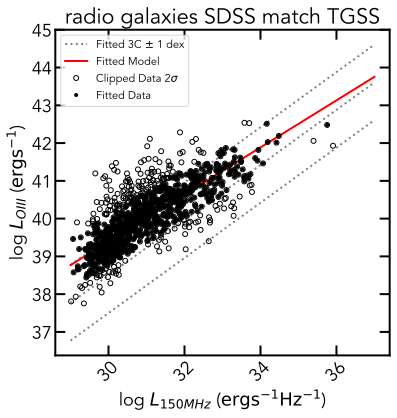

In [281]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

log_L200=np.linspace(29,37,10)
y_log_L200=0.73*log_L200+16.6

ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3C $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

ax.errorbar(x, y, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k.", fillstyle="none", label=r"Clipped Data 2$\sigma$")

ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{150MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match TGSS')

#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.legend(fontsize=11.)
plt.show()
plt.close()
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=100, transparent=False, bbox_inches='tight')


### select fading 

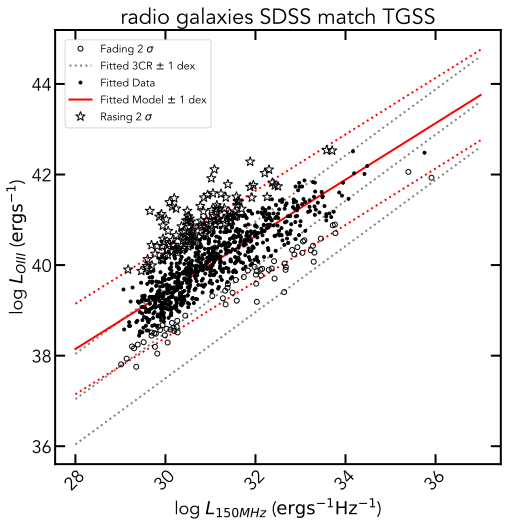

In [282]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


log_L200=np.linspace(28,37,10) #best fit for 3CRR sample
y_log_L200=0.73*log_L200+16.6
ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

y_log_L200_fitted_line= fitted_line.slope.value*log_L200+fitted_line.intercept.value
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200_fitted_line-1,ls=':',color='red',linewidth=2)
ax.plot(log_L200,y_log_L200_fitted_line+1,ls=':',color='red',linewidth=2)


ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

RG_OIII_match_TGSS_selectsnrgt5['fading1dex']=0

for index, (ra_,dec_,x_,y_,mask_) in enumerate(zip(RG_OIII_match_TGSS_selectsnrgt5['RAdeg'],RG_OIII_match_TGSS_selectsnrgt5['DEdeg'],x,y,mask)):
    if mask_:
        if x_*fitted_line.slope.value+fitted_line.intercept.value>y_:
            ax.errorbar(x_, y_,
                #xerr=xerr, yerr=yerr,
                markersize=10,
                fmt="k.", fillstyle="none", label=r"Fading 2 $\sigma$")
            if x_*fitted_line.slope.value+fitted_line.intercept.value>y_+1:
                RG_OIII_match_TGSS_selectsnrgt5['fading1dex'][index]=1
                #print(index,ra_,dec_,'Fading more than 1dex')

        else:
            #print(name,'Rasing')
            ax.errorbar(x_, y_,
            #xerr=xerr, yerr=yerr,
            markersize=10,
            fmt="k*", fillstyle="none", label=r"Rasing 2 $\sigma$")
            
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{150MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match TGSS')

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.legend(fontsize=11.)
plt.show()
fig.savefig('TGSS_cat_LOIII_Lradio_clip_%s_sigma_fading.png'%sigma, dpi=100, transparent=False, bbox_inches='tight')
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=400, transparent=False, bbox_inches='tight')
            


In [485]:
RG_OIII_match_TGSS_selectsnrgt5_fadeing=RG_OIII_match_TGSS_selectsnrgt5[RG_OIII_match_TGSS_selectsnrgt5['fading1dex']==1]

RG_OIII_match_TGSS_selectsnrgt5_fadeing[['RAdeg','DEdeg']].to_pandas().to_csv('%s/RG_OIII_match_TGSS_selectsnrgt5_fadeing_radec.csv'%Surveyfits_root,
                                                            float_format='%.5f',index=False)



In [486]:
RG_OIII_match_TGSS_selectsnrgt5_fadeing

Plate,MJD,Fiber,RAhour,DEdeg,z,SNVSS,RCl,SFIRST,Offset,A,M,L,H,RAdeg,z_,ra_,dec_,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,F200MHz,F200MHz_err,Dcm,L200MHz,L200MHz_err,logL200MHz,h_alpha_Lum,h_alpha_Lum_err,h_beta_Lum,h_beta_Lum_err,oiii_5007_Lum,oiii_5007_Lum_err,OIII_snr,fading1dex
,,,h,deg,,Jy,,Jy,arcsec,,,,,h,,,,,,,,,,mJy,mJy,,,,,,,,,,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
544,52201,127,7.9744746,37.78657,0.04082,2.8436,4,0.2255,0.63,1,0,1,0,119.617119,0.04082455,119.61712,37.786573,473.8094,22.20402,125.398,11.88104,278.0402,12.71944,11344.9,1134.8,5.5677506951507126e+26,4.419469059671935e+32,4.42067668195904e+31,32.64537009778688,1.845750939613151e+40,8.649699811398676e+38,4.884949018014626e+39,4.6283253864489465e+38,1.0831211039718261e+40,4.9549287817745076e+38,21.859468655852776,1
654,52146,194,0.5266587,-10.50482,0.01195,0.0181,1,0.011,6.87,0,1,0,0,7.8998805,0.01195358,7.8998815,-10.504818,203.6205,2.317034,48.79432,1.219951,17.80119,1.03452,70.3,8.0,1.594206947785439e+26,2.245197676333109e+29,2.5549902433378196e+28,29.35125458407488,6.503104885544607e+38,7.399999079352503e+36,1.558362644128793e+38,3.896203627937771e+36,5.685233346225345e+37,3.303985633172302e+36,17.207197540888526,1
656,52148,390,0.6973513,-9.30315,0.05536,0.054,1,0.0402,0.25,1,0,1,0,10.4602695,0.05535877,10.460272,-9.3031461,69.6776,3.329111,26.72147,3.058677,22.35062,2.944763,524.5,52.9,7.633189715146557e+26,3.840320489968821e+31,3.873268902180183e+30,31.58436746947611,5.101702859329867e+39,2.437531589452925e+38,1.9565111298967996e+39,2.239523347053644e+38,1.6364832020878347e+39,2.1561170041948625e+38,7.589955456517213,1
818,52395,570,16.774561,38.52111,0.10752,0.419,4,0.0,--,1,1,1,0,251.61841499999997,0.1075177,251.61841,38.521109,190.078,5.378443,47.1045,3.261364,26.42692,3.590671,1568.3,157.4,1.538538375403428e+27,4.665043233317461e+32,4.681998373552052e+31,32.668855672928004,5.654033588615165e+40,1.5998641282237876e+39,1.4011638652286065e+40,9.70120771509607e+38,7.860914641549568e+39,1.068075970899652e+39,7.359883431258392,1
827,52312,461,8.4550939,37.78126,0.02155,0.0276,1,0.0232,4.03,0,0,0,0,126.8264085,0.0215486,126.82641,37.781262,374.9798,4.770653,74.2257,2.927398,30.88198,2.939006,177.3,18.7,2.89647798352404e+26,1.8692141632746413e+30,1.9714779951063615e+29,30.271659063069546,3.9532856914940344e+39,5.029538722881364e+37,7.825365466383223e+38,3.0862570801702534e+37,3.2557831024232487e+38,3.0984950034682177e+37,10.50762740872254,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,54115,196,13.434,36.79981,0.0544,0.957,2,0.0,--,1,1,1,0,201.51,0.05440015,201.50999,36.799807,103.138,5.97696,28.39235,3.568934,71.47186,4.21325,3762.4,376.4,7.495511939250526e+26,2.6563018839615428e+32,2.6574315041545944e+31,32.424277430292506,7.28167296693668e+39,4.219809193164678e+38,2.0045357430123196e+39,2.519712446293431e+38,5.0460035181861485e+39,2.9746076739849493e+38,16.96359342550288,1
2124,53770,365,14.137874,25.56577,0.15903,0.7112,1,0.5893,0.48,1,1,1,0,212.06811,0.1590251,212.06811,25.565771,46.95025,6.769135,21.26121,3.639461,27.05436,3.050397,2923.8,292.6,2.3545956181647872e+27,2.0369960588496168e+33,2.0385287872610914e+32,33.30899018873432,3.270999186401403e+40,4.7160206980029424e+39,1.4812573013329934e+40,2.5355933077970056e+39,1.8848630102845172e+40,2.125195521898452e+39,8.869127526679314,1


# RG_OIII GLEAM

#crossmatch catalogs
fig = plt.figure(figsize=(4, 4))
#Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

max_radius = np.arange(1,30)*1.0 / 3600  # 1 arcsec
for i in max_radius:
    dist, ind = crossmatch_angular(RG_OIIIX,GGSMX, i)
    match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'
    ax.scatter(i*3600,np.sum(match),color='black')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N')

ax.set_xlim(0, max(max_radius)*3600)
set_ax_tick(ax)
plt.show()
plt.close()

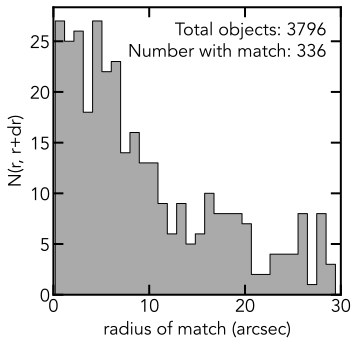

In [208]:
# crossmatch catalogs
max_radius = 30. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(RG_OIIIX,GGSMX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (RG_OIIIX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()
plt.close()

In [ ]:
GGSMdata.columns

In [209]:
RG_OIII_match_GGSM=SDSS_RG_18286_match_SDSS_galaxies_emission_line[match]
#drop_index()
GGSM_match_RG_OIII=GGSMdata[ind[match]] 

RG_OIII_match_GGSM['F200MHz']=GGSM_match_RG_OIII['S_200']*1000 # mJy
RG_OIII_match_GGSM['F200MHz_err']=GGSM_match_RG_OIII['S_200']*1000*0.08 # 8%error
RG_OIII_match_GGSM['Dcm']=cosmo.luminosity_distance(RG_OIII_match_GGSM['z']).to(u.cm).value

RG_OIII_match_GGSM['L200MHz']=4*np.pi*RG_OIII_match_GGSM['Dcm']**2*RG_OIII_match_GGSM['F200MHz']*1.0e-26
RG_OIII_match_GGSM['L200MHz_err']=4*np.pi*RG_OIII_match_GGSM['Dcm']**2*RG_OIII_match_GGSM['F200MHz_err']*1.0e-26

RG_OIII_match_GGSM['logL200MHz']=np.log10(RG_OIII_match_GGSM['L200MHz'])

RG_OIII_match_GGSM['h_alpha_Lum']=RG_OIII_match_GGSM['h_alpha_flux']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17
RG_OIII_match_GGSM['h_alpha_Lum_err']=RG_OIII_match_GGSM['h_alpha_flux_err']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17


RG_OIII_match_GGSM['h_beta_Lum']=RG_OIII_match_GGSM['h_beta_flux']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17
RG_OIII_match_GGSM['h_beta_Lum_err']=RG_OIII_match_GGSM['h_beta_flux_err']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17


RG_OIII_match_GGSM['oiii_5007_Lum']=RG_OIII_match_GGSM['oiii_5007_flux']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17
RG_OIII_match_GGSM['oiii_5007_Lum_err']=RG_OIII_match_GGSM['oiii_5007_flux_err']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17

RG_OIII_match_GGSM['OIII_snr']=RG_OIII_match_GGSM['oiii_5007_flux']/RG_OIII_match_GGSM['oiii_5007_flux_err']
RG_OIII_match_GGSM_selectsnrgt5=RG_OIII_match_GGSM[RG_OIII_match_GGSM['OIII_snr']>5]


In [210]:
RG_OIII_match_GGSM_selectsnrgt5[:5]

Plate,MJD,Fiber,RAhour,DEdeg,z,SNVSS,RCl,SFIRST,Offset,A,M,L,H,RAdeg,z_,ra_,dec_,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,F200MHz,F200MHz_err,Dcm,L200MHz,L200MHz_err,logL200MHz,h_alpha_Lum,h_alpha_Lum_err,h_beta_Lum,h_beta_Lum_err,oiii_5007_Lum,oiii_5007_Lum_err,OIII_snr
,,,h,deg,,Jy,,Jy,arcsec,,,,,h,,,,,,,,,,,,,,,,,,,,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
266,51602,554,9.7871195,0.66564,0.02012,0.018,1,0.0131,0.79,1,1,1,0,146.8067925,0.0200758,146.8068,0.66563514,853.0652,10.24324,156.3904,5.302642,70.22443,5.325087,87.00500293184825,6.96040023454786,2.701283727512259e+26,7.97800850273653e+29,6.382406802189223e+28,29.90189449483288,7.82226445566544e+39,9.392638706027445e+37,1.4340370081059457e+39,4.862309239401478e+37,6.4392975203813926e+38,4.882890400807126e+37,13.18747092770503
267,51608,260,9.8285522,-0.84008,0.08097,0.167,2,0.0115,0.39,1,1,1,0,147.42828300000002,0.08097252,147.42829,-0.84007574,73.12326,4.779845,31.29603,4.112629,37.87999,3.802993,428.466976358985,34.2773581087188,1.1373364373375522e+27,6.964743470687639e+31,5.571794776550111e+30,31.842905124878214,1.1886207706558408e+40,7.769652293285976e+38,5.087179003926836e+39,6.685090696724352e+38,6.15740366420145e+39,6.1817764558893665e+38,9.960573159088119
268,51633,38,10.031375,-0.12518,0.03283,0.0364,1,0.026,0.45,1,1,1,0,150.470625,0.03283051,150.47062,-0.12517918,151.1079,7.748601,45.61246,5.380959,95.64,6.192943,79.28620689731852,6.342896551785482,4.450941074117452e+26,1.9738365873432252e+30,1.57906926987458e+29,30.295311194862098,3.7618434949583725e+39,1.9290205387592537e+38,1.1355259118818337e+39,1.3395941317950755e+38,2.3809656004604574e+39,1.5417382108544947e+38,15.443384510401598
271,51883,439,10.281616,0.48254,0.1163,0.0109,2,0.0,--,1,1,0,1,154.22424,0.116298,154.22425,0.48254172,1257.747,10.50582,365.8867,6.011618,3684.633,21.37572,58.318186551332474,4.665454924106598,1.6741654658457787e+27,2.0540482129707417e+31,1.643238570376593e+30,31.312610633215208,4.429961098747991e+41,3.700296952443426e+39,1.2887042048593847e+41,2.1173760605696697e+39,1.2977793509476155e+42,7.528827980327475e+39,172.3746849228938
272,51941,437,10.371746,0.51408,0.09725,0.1689,1,0.1674,0.33,1,1,1,0,155.57619,0.09725063,155.57618,0.51408437,106.782,5.726618,27.29641,4.186037,100.3127,5.364666,330.6222486494335,26.44977989195468,1.381745363283633e+27,7.932278817282282e+31,6.345823053825825e+30,31.899397971125676,2.561910458618762e+40,1.3739284286410122e+39,6.548946288863833e+39,1.0043127091143739e+39,2.406699212060894e+40,1.2870890161634433e+39,18.698778265040175


In [211]:
len(RG_OIII_match_GGSM_selectsnrgt5)

334

In [283]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

# define a model for a line
# line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# generate x, y data non-uniformly spaced in x
# add noise to y measurements

'''x=np.array(RG_OIII_match_TGSS['L200MHz'])
y=np.array(RG_OIII_match_TGSS['oiii_5007_Lum'])

xerr=np.array(RG_OIII_match_TGSS['L200MHz_err'])
yerr=np.array(RG_OIII_match_TGSS['oiii_5007_Lum_err'])
'''

dataplot=RG_OIII_match_GGSM_selectsnrgt5
x= np.log10(dataplot['L200MHz'])
y= np.log10(dataplot['oiii_5007_Lum'])
xerr= dataplot['L200MHz_err']/np.log(10)/x
yerr= dataplot['oiii_5007_Lum_err']/np.log(10)/y


weights=np.zeros(len(x))+1

#xerr

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=2.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/weights)
filtered_data = np.ma.masked_array(y, mask=mask)

print(fitted_line)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept    
    ------------------ -----------------
    0.6340674203837922 20.07478669974888


len(mask),np.sum(mask),len(mask)-np.sum(mask),

plt.plot(x[mask], y[mask], 'x',
         color='#d62728', label="rejected data")

In [214]:
slope,intercept=linear_calc(x,y)
print(slope,intercept)

0.6105686134536161 20.850213889776526


In [ ]:
len(x),len(y),len(filtered_data)

## plot

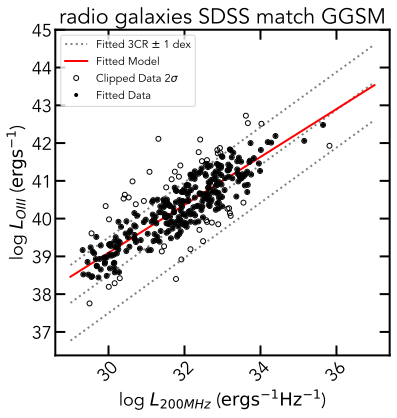

In [284]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

log_L200=np.linspace(29,37,10)
y_log_L200=0.73*log_L200+16.6

ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

ax.errorbar(x, y, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k.", fillstyle="none", label=r"Clipped Data 2$\sigma$")

ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{200MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match GGSM')

#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.legend(fontsize=11.)
#plt.show()
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=100, transparent=False, bbox_inches='tight')


## select fading

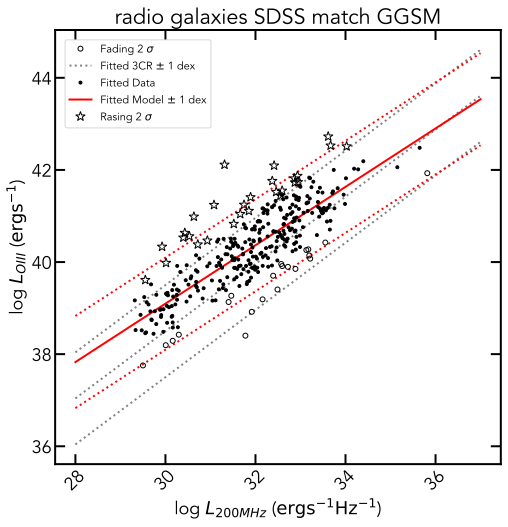

In [285]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


log_L200=np.linspace(28,37,10) #best fit for 3CRR sample
y_log_L200=0.73*log_L200+16.6
ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

y_log_L200_fitted_line= fitted_line.slope.value*log_L200+fitted_line.intercept.value
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200_fitted_line-1,ls=':',color='red',linewidth=2)
ax.plot(log_L200,y_log_L200_fitted_line+1,ls=':',color='red',linewidth=2)


ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

RG_OIII_match_GGSM_selectsnrgt5['fading1dex']=0

for index, (ra_,dec_,x_,y_,mask_) in enumerate(zip(RG_OIII_match_GGSM_selectsnrgt5['RAdeg'],RG_OIII_match_GGSM_selectsnrgt5['DEdeg'],x,y,mask)):
    if mask_:
        if x_*fitted_line.slope.value+fitted_line.intercept.value>y_:
            ax.errorbar(x_, y_,
                #xerr=xerr, yerr=yerr,
                markersize=10,
                fmt="k.", fillstyle="none", label=r"Fading 2 $\sigma$")
            if x_*fitted_line.slope.value+fitted_line.intercept.value>y_+1:
                RG_OIII_match_GGSM_selectsnrgt5['fading1dex'][index]=1
                #print(index,ra_,dec_,'Fading more than 1dex')

        else:
            #print(name,'Rasing')
            ax.errorbar(x_, y_,
            #xerr=xerr, yerr=yerr,
            markersize=10,
            fmt="k*", fillstyle="none", label=r"Rasing 2 $\sigma$")
            
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{200MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match GGSM')

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.legend(fontsize=11.)
plt.show()
fig.savefig('GGSM_cat_LOIII_Lradio_clip_%s_sigma_fading.png'%sigma, dpi=100, transparent=False, bbox_inches='tight')

In [217]:
RG_OIII_match_GGSM_selectsnrgt5_fadeing=RG_OIII_match_GGSM_selectsnrgt5[RG_OIII_match_GGSM_selectsnrgt5['fading1dex']==1]

RG_OIII_match_GGSM_selectsnrgt5_fadeing[['RAdeg','DEdeg']].to_pandas().to_csv('%s/RG_OIII_match_GGSM_selectsnrgt5_fadeing.csv'%Surveyfits_root,
                                                            float_format='%.5f',index=False)


RG_OIII_match_GGSM_selectsnrgt5_fadeing.colnames

In [218]:
RG_OIII_match_GGSM_selectsnrgt5_fadeing

Plate,MJD,Fiber,RAhour,DEdeg,z,SNVSS,RCl,SFIRST,Offset,A,M,L,H,RAdeg,z_,ra_,dec_,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,F200MHz,F200MHz_err,Dcm,L200MHz,L200MHz_err,logL200MHz,h_alpha_Lum,h_alpha_Lum_err,h_beta_Lum,h_beta_Lum_err,oiii_5007_Lum,oiii_5007_Lum_err,OIII_snr,fading1dex
,,,h,deg,,Jy,,Jy,arcsec,,,,,h,,,,,,,,,,,,,,,,,,,,,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
581,52356,49,11.173638,3.36078,0.02996,0.5874,4,0.0,--,1,1,1,0,167.60457,0.02996491,167.60457,3.3607753,65.18527,1.887363,18.25035,2.020967,12.21405,1.958735,2895.281939397625,231.62255515181002,4.052959930398974e+26,5.976478279676064e+31,4.781182623740852e+30,31.776445345486145,1.3455627412606081e+39,3.8959190197936507e+37,3.767260759212248e+38,4.1717061178349457e+37,2.52123993655225e+38,4.043246021690325e+37,6.235682723798779,1
654,52146,194,0.5266587,-10.50482,0.01195,0.0181,1,0.011,6.87,0,1,0,0,7.8998805,0.01195358,7.8998815,-10.504818,203.6205,2.317034,48.79432,1.219951,17.80119,1.03452,99.16669749194809,7.933335799355847,1.594206947785439e+26,3.1671243069495053e+29,2.533699445559604e+28,29.500665109397417,6.503104885544607e+38,7.399999079352503e+36,1.558362644128793e+38,3.896203627937771e+36,5.685233346225345e+37,3.303985633172302e+36,17.207197540888526,1
1444,53054,96,11.727666,46.35569,0.11603,0.8634,2,0.0,--,1,1,1,0,175.91499,0.1160252,175.91499,46.355687,200.4729,6.383862,58.52781,3.922552,33.83943,3.991704,4690.993193604899,375.27945548839193,1.6699731115719102e+27,1.6439690004244278e+33,1.315175200339542e+32,33.21589362398777,7.025617378308746e+40,2.2372386396328298e+39,2.0511201217239458e+40,1.3746670746280285e+39,1.1859103523721278e+40,1.3989015468656632e+39,8.477439709958453,1
2110,53467,344,13.395838,31.56576,0.01618,0.1597,2,0.0022,0.17,1,0,1,0,200.93757,0.01618442,200.93758,31.565758,224.3062,16.51748,78.18828,10.77497,140.8653,11.40813,14058.240581750499,1124.65924654004,2.1656642736374723e+26,8.28558352242044e+31,6.628466817936353e+30,31.918323099555998,1.3220059394269714e+39,9.734999150431956e+37,4.6082261905189905e+38,6.350504059694931e+37,8.302256614358503e+38,6.723673094080777e+37,12.347799332581237,1
2117,54115,264,13.871635,31.44625,0.04519,4.686,4,3.7091,0.56,1,0,1,0,208.074525,0.04519421,208.07452,31.44625,848.4686,10.49351,128.247,4.42787,147.5754,4.799711,16075.809285882982,1286.0647428706386,6.1840471472478084e+26,7.725530177912651e+32,6.180424142330121e+31,32.887928293331946,4.0774742084477675e+40,5.042852072674077e+38,6.16314893457225e+39,2.1278955665960552e+38,7.092011269496156e+39,2.3065906988783133e+38,30.74672620914051,1
2434,53826,588,9.0780691,14.91928,0.07665,0.2006,1,0.0319,1.83,1,1,1,0,136.1710365,0.07664999,136.17103,14.919281,134.8728,2.337996,28.09233,1.742913,10.69339,1.777464,992.2225838595398,79.37780670876319,1.0733424230707457e+27,1.436466696090076e+32,1.1491733568720608e+31,32.15729556149958,1.9525889509066417e+40,3.384778218339001e+38,4.067000400616223e+39,2.5232609289579126e+38,1.5481101572545075e+39,2.5732813191646668e+38,6.016093715540793,1
2644,54210,279,12.109263,22.26045,0.06506,0.873,4,0.0,--,1,1,1,0,181.638945,0.06505594,181.63895,22.260446,90.27085,9.204825,41.76719,6.068722,24.71995,4.517708,3006.453420124996,240.51627360999967,9.034596194303186e+26,3.0837689853319937e+32,2.467015188265595e+31,32.489081836255245,9.259230349159475e+39,9.441541206125994e+38,4.284129741185666e+39,6.224788502934423e+38,2.5355661464327053e+39,4.6338877968071144e+38,5.471790120122859,1


# RG_OIII LoTSS

In [ ]:
# crossmatch catalogs
fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

max_radius = np.arange(1,30)*1.0 / 3600  # 1 arcsec
for i in max_radius:
    dist, ind = crossmatch_angular(RG_OIIIX,LoTSSX, i)
    match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'
    ax.scatter(i*3600,np.sum(match),color='black')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N')

ax.set_xlim(0, max(max_radius)*3600)
set_ax_tick(ax)
plt.show()
plt.close()

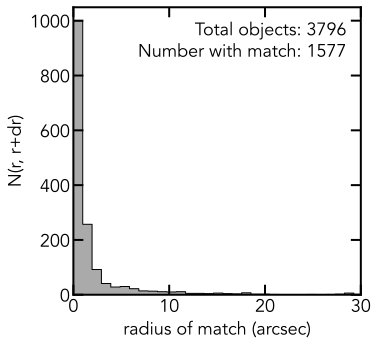

In [60]:
# crossmatch catalogs
max_radius = 30. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(RG_OIIIX,LoTSSX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (RG_OIIIX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()
plt.close()

## plot

In [61]:
RG_OIII_match_LoTSS=SDSS_RG_18286_match_SDSS_galaxies_emission_line[match]
#drop_index()
LoTSS_match_RG_OIII=LoTSSdata[ind[match]]

In [63]:
LoTSS_match_RG_OIII[:2]

Source,RAdeg,e_RAdeg,DEdeg,e_DEdeg,Speak,e_Speak,SpeakTot,e_SpeakTot,Maj,e_Maj,Min,e_Min,DCMaj,e_DCMaj,DCMin,e_DCMin,PA,e_PA,DCPA,e_DCPA,Islrms,SCode,Mosaic,Npoint,MaskFract
,deg,arcsec,deg,arcsec,mJy/beam,mJy/beam,mJy,mJy,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,deg,deg,deg,deg,mJy/beam,,,,
str22,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,str11,int64,float64
ILTJ170506.88+625139.1,256.27868,0.17,62.86088,0.08,6.693,0.095,20.481,0.39,13.83,0.4,8.13,0.18,12.46,0.4,5.48,0.18,177.12,2.77,177.12,2.77,0.095,M,P253+63,2,1.0
ILTJ165846.03+625616.6,254.69178,0.2,62.93797,0.11,100.079,0.107,1037.419,3.104,111.36,0.52,26.44,0.12,111.2,0.52,25.75,0.12,155.77,0.39,155.77,0.39,0.107,M,P253+63,2,1.0


LoTSS_match_RG_OIII.colnames

In [69]:
RG_OIII_match_LoTSS['F200MHz']=LoTSS_match_RG_OIII['SpeakTot'] #mJy
RG_OIII_match_LoTSS['F200MHz_err']=LoTSS_match_RG_OIII['e_SpeakTot']
RG_OIII_match_LoTSS['Dcm']=cosmo.luminosity_distance(RG_OIII_match_LoTSS['z']).to(u.cm).value

RG_OIII_match_LoTSS['L200MHz']=4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*RG_OIII_match_LoTSS['F200MHz']*1.0e-26
RG_OIII_match_LoTSS['L200MHz_err']=4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*RG_OIII_match_LoTSS['F200MHz_err']*1.0e-26

RG_OIII_match_LoTSS['logL200MHz']=np.log10(RG_OIII_match_LoTSS['L200MHz'])

RG_OIII_match_LoTSS['h_alpha_Lum']=RG_OIII_match_LoTSS['h_alpha_flux']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17
RG_OIII_match_LoTSS['h_alpha_Lum_err']=RG_OIII_match_LoTSS['h_alpha_flux_err']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17


RG_OIII_match_LoTSS['h_beta_Lum']=RG_OIII_match_LoTSS['h_beta_flux']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17
RG_OIII_match_LoTSS['h_beta_Lum_err']=RG_OIII_match_LoTSS['h_beta_flux_err']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17


RG_OIII_match_LoTSS['oiii_5007_Lum']=RG_OIII_match_LoTSS['oiii_5007_flux']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17
RG_OIII_match_LoTSS['oiii_5007_Lum_err']=RG_OIII_match_LoTSS['oiii_5007_flux_err']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17

RG_OIII_match_LoTSS['OIII_snr']=RG_OIII_match_LoTSS['oiii_5007_flux']/RG_OIII_match_LoTSS['oiii_5007_flux_err']
RG_OIII_match_LoTSS_selectsnrgt5=RG_OIII_match_LoTSS[RG_OIII_match_LoTSS['OIII_snr']>5]

In [79]:
len(RG_OIII_match_LoTSS_selectsnrgt5)

1575

In [287]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

# define a model for a line
# line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# generate x, y data non-uniformly spaced in x
# add noise to y measurements

dataplot=RG_OIII_match_LoTSS_selectsnrgt5
x= np.log10(dataplot['L200MHz'])
y= np.log10(dataplot['oiii_5007_Lum'])
xerr= dataplot['L200MHz_err']/np.log(10)/x
yerr= dataplot['oiii_5007_Lum_err']/np.log(10)/y


weights=np.zeros(len(x))+1

#xerr

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=2.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/weights)
filtered_data = np.ma.masked_array(y, mask=mask)

print(fitted_line)

slope,intercept=linear_calc(x,y)
print(slope,intercept)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ------------------ ------------------
    0.6348588277222444 20.487744348976932


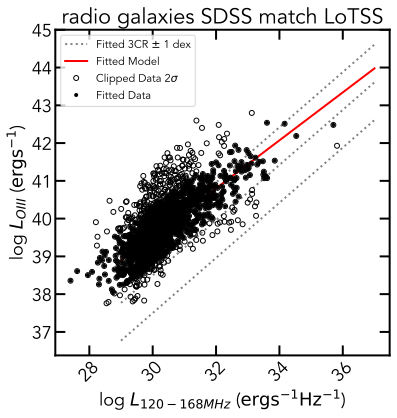

In [288]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

log_L200=np.linspace(29,37,10)
y_log_L200=0.73*log_L200+16.6

ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

ax.errorbar(x, y,
            #xerr=xerr, yerr=yerr,
            markersize=10,
            fmt="k.", fillstyle="none", label=r"Clipped Data 2$\sigma$")

ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{120-168MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match LoTSS')

#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.legend(fontsize=11.)
#plt.show()
plt.savefig('L200MHz_LOIII_LoTSS_SDSS.png',dpi=100, transparent=False, bbox_inches='tight')

In [91]:
RG_OIII_match_LoTSS_selectsnrgt5.colnames

['Plate',
 'MJD',
 'Fiber',
 'RAhour',
 'DEdeg',
 'z',
 'SNVSS',
 'RCl',
 'SFIRST',
 'Offset',
 'A',
 'M',
 'L',
 'H',
 'RAdeg',
 'z_',
 'ra_',
 'dec_',
 'h_alpha_flux',
 'h_alpha_flux_err',
 'h_beta_flux',
 'h_beta_flux_err',
 'oiii_5007_flux',
 'oiii_5007_flux_err',
 'F200MHz',
 'F200MHz_err',
 'Dcm',
 'L200MHz',
 'L200MHz_err',
 'logL200MHz',
 'h_alpha_Lum',
 'h_alpha_Lum_err',
 'h_beta_Lum',
 'h_beta_Lum_err',
 'oiii_5007_Lum',
 'oiii_5007_Lum_err',
 'OIII_snr']

## select_fading

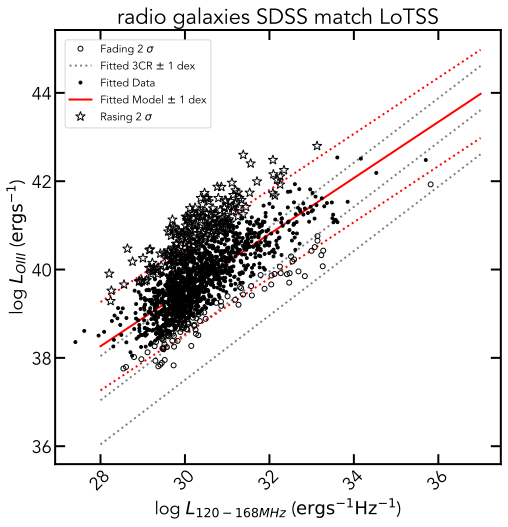

In [289]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


log_L200=np.linspace(28,37,10) #best fit for 3CRR sample
y_log_L200=0.73*log_L200+16.6
ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

y_log_L200_fitted_line= fitted_line.slope.value*log_L200+fitted_line.intercept.value
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200_fitted_line-1,ls=':',color='red',linewidth=2)
ax.plot(log_L200,y_log_L200_fitted_line+1,ls=':',color='red',linewidth=2)


ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

RG_OIII_match_LoTSS_selectsnrgt5['fading1dex']=0

for index, (ra_,dec_,x_,y_,mask_) in enumerate(zip(RG_OIII_match_LoTSS_selectsnrgt5['RAdeg'],RG_OIII_match_LoTSS_selectsnrgt5['DEdeg'],x,y,mask)):
    if mask_:
        if x_*fitted_line.slope.value+fitted_line.intercept.value>y_:
            ax.errorbar(x_, y_, 
                #xerr=xerr, yerr=yerr, 
                markersize=10,
                fmt="k.", fillstyle="none", label=r"Fading 2 $\sigma$")            
            if x_*fitted_line.slope.value+fitted_line.intercept.value>y_+1:
                RG_OIII_match_LoTSS_selectsnrgt5['fading1dex'][index]=1
                #print(index,ra_,dec_,'Fading more than 1dex')

        else:
            #print(name,'Rasing')
            ax.errorbar(x_, y_, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k*", fillstyle="none", label=r"Rasing 2 $\sigma$")            
            
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{120-168MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match LoTSS')

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.legend(fontsize=11.)
plt.show()
fig.savefig('LoTSS_cat_LOIII_Lradio_clip_%s_sigma_fading.png'%sigma, dpi=100, transparent=False, bbox_inches='tight')
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=400, transparent=False, bbox_inches='tight')
            

In [192]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing=RG_OIII_match_LoTSS_selectsnrgt5[RG_OIII_match_LoTSS_selectsnrgt5['fading1dex']==1]

RG_OIII_match_LoTSS_selectsnrgt5_fadeing[['RAdeg','DEdeg']].to_pandas().to_csv('%s/RG_OIII_match_LoTSS_selectsnrgt5_fadeing.csv'%Surveyfits_root,
                                                            float_format='%.5f',index=False)



In [176]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing

Plate,MJD,Fiber,RAhour,DEdeg,z,SNVSS,RCl,SFIRST,Offset,A,M,L,H,RAdeg,z_,ra_,dec_,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,F200MHz,F200MHz_err,Dcm,L200MHz,L200MHz_err,logL200MHz,h_alpha_Lum,h_alpha_Lum_err,h_beta_Lum,h_beta_Lum_err,oiii_5007_Lum,oiii_5007_Lum_err,OIII_snr,fading1dex
,,,h,deg,,Jy,,Jy,arcsec,,,,,h,,,,,,,,,,mJy,mJy,,,,,,,,,,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
349,51699,169,16.979768,62.94017,0.10627,0.258,4,0.0,--,1,1,1,0,254.69652,0.1062736,254.69652,62.940165,22.96743,1.976785,8.895367,1.681109,28.44237,1.834459,1037.419,3.104,1.5193474904559407e+27,3.0093887105847383e+32,9.004213878534157e+29,32.47847828742734,6.662488787379567e+39,5.734341150733939e+38,2.5804055088935167e+39,4.876631761961559e+38,8.250682432100631e+39,5.321475898003187e+38,15.504500236854572,1
443,51873,94,8.4971858,48.77999,0.02402,0.0079,1,0.0054,5.13,0,1,0,0,127.45778700000001,0.02401523,127.45779,48.779989,162.3551,1.374989,30.59822,0.7585712,5.145088,0.6204925,40.963,0.986,3.234625553726086e+26,5.3857928552878235e+29,1.2963874118872626e+28,29.731249645856877,2.1346359827149868e+39,1.8078280234112123e+37,4.0230372448435176e+38,9.973652684586361e+36,6.764733586462691e+37,8.158201482459001e+36,8.291942287779467,1
620,52375,453,15.984158,51.30468,0.01251,0.0156,2,0.0172,1.01,0,0,0,0,239.76237,0.01250561,239.76238,51.304677,253.9272,5.730159,47.07793,2.920041,21.95732,3.170865,81.081,1.089,1.6696470941690368e+26,2.840392337030598e+29,3.814934762800559e+27,29.45337833231433,8.89546099633251e+38,2.0073629720362248e+37,1.6492124124673216e+38,1.0229353461618831e+37,7.691987453253991e+37,1.1108028573597424e+37,6.924709818929535,1
624,52377,376,16.261449,47.18661,0.19863,0.625,4,0.0981,0.24,1,1,1,0,243.92173499999998,0.1986253,243.92174,47.18661,97.55244,6.908607,60.54595,5.924488,23.22171,3.745297,871.039,35.838,3.014380014837057e+27,9.945885797013173e+32,4.09213198482913e+31,32.99764346816669,1.1138943577267835e+41,7.888534983903794e+39,6.913388541404801e+40,6.764826954220761e+39,2.6515514881808824e+40,4.276535980351746e+39,6.200231917522163,1
817,52381,5,16.696016,39.64363,0.03015,0.0103,3,0.0,--,0,1,0,0,250.44024000000002,0.03014824,250.44024,39.643634,112.3107,1.304704,25.40169,0.5860996,8.918985,0.4744322,67.503,0.766,4.079255047796875e+26,1.4115447713145326e+30,1.6017707284519682e+28,30.14969465763454,2.3485116416703712e+39,2.7282463139610923e+37,5.31170802809544e+38,1.2255837901271635e+37,1.865035130613861e+38,9.920778206201956e+36,18.799282595068377,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,53117,169,13.096272,46.46178,0.02484,0.0086,1,0.0056,1.41,0,0,0,0,196.44408,0.02483789,196.44407,46.461777,201.4033,4.500907,33.7782,3.351871,17.21051,3.230302,47.542,1.036,3.347162977944608e+26,6.69331139449863e+29,1.4585567718439653e+28,29.82564103025773,2.8355033502579315e+39,6.3367069346427665e+37,4.755542697943999e+38,4.719009792854637e+37,2.42302180573246e+38,4.547856039769406e+37,5.327833125200058,1
1590,52974,561,9.0540843,30.59134,0.01435,0.006,3,0.0,--,0,0,0,0,135.8112645,0.01435458,135.81126,30.591335,226.2935,3.829563,50.53113,2.187321,15.17461,2.195134,56.468,3.103,1.9179814790247767e+26,2.6103641013508776e+29,1.4344336272741683e+28,29.416701088249777,1.0460941219257718e+39,1.7703042039848358e+37,2.335918533553417e+38,1.011139798918131e+37,7.014814974144655e+37,1.0147515391469075e+37,6.912839945078524,1


In [182]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing[RG_OIII_match_LoTSS_selectsnrgt5_fadeing['z']<0.4]

Plate,MJD,Fiber,RAhour,DEdeg,z,SNVSS,RCl,SFIRST,Offset,A,M,L,H,RAdeg,z_,ra_,dec_,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,F200MHz,F200MHz_err,Dcm,L200MHz,L200MHz_err,logL200MHz,h_alpha_Lum,h_alpha_Lum_err,h_beta_Lum,h_beta_Lum_err,oiii_5007_Lum,oiii_5007_Lum_err,OIII_snr,fading1dex
,,,h,deg,,Jy,,Jy,arcsec,,,,,h,,,,,,,,,,mJy,mJy,,,,,,,,,,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
349,51699,169,16.979768,62.94017,0.10627,0.258,4,0.0,--,1,1,1,0,254.69652,0.1062736,254.69652,62.940165,22.96743,1.976785,8.895367,1.681109,28.44237,1.834459,1037.419,3.104,1.5193474904559407e+27,3.0093887105847383e+32,9.004213878534157e+29,32.47847828742734,6.662488787379567e+39,5.734341150733939e+38,2.5804055088935167e+39,4.876631761961559e+38,8.250682432100631e+39,5.321475898003187e+38,15.504500236854572,1
443,51873,94,8.4971858,48.77999,0.02402,0.0079,1,0.0054,5.13,0,1,0,0,127.45778700000001,0.02401523,127.45779,48.779989,162.3551,1.374989,30.59822,0.7585712,5.145088,0.6204925,40.963,0.986,3.234625553726086e+26,5.3857928552878235e+29,1.2963874118872626e+28,29.731249645856877,2.1346359827149868e+39,1.8078280234112123e+37,4.0230372448435176e+38,9.973652684586361e+36,6.764733586462691e+37,8.158201482459001e+36,8.291942287779467,1
620,52375,453,15.984158,51.30468,0.01251,0.0156,2,0.0172,1.01,0,0,0,0,239.76237,0.01250561,239.76238,51.304677,253.9272,5.730159,47.07793,2.920041,21.95732,3.170865,81.081,1.089,1.6696470941690368e+26,2.840392337030598e+29,3.814934762800559e+27,29.45337833231433,8.89546099633251e+38,2.0073629720362248e+37,1.6492124124673216e+38,1.0229353461618831e+37,7.691987453253991e+37,1.1108028573597424e+37,6.924709818929535,1
624,52377,376,16.261449,47.18661,0.19863,0.625,4,0.0981,0.24,1,1,1,0,243.92173499999998,0.1986253,243.92174,47.18661,97.55244,6.908607,60.54595,5.924488,23.22171,3.745297,871.039,35.838,3.014380014837057e+27,9.945885797013173e+32,4.09213198482913e+31,32.99764346816669,1.1138943577267835e+41,7.888534983903794e+39,6.913388541404801e+40,6.764826954220761e+39,2.6515514881808824e+40,4.276535980351746e+39,6.200231917522163,1
817,52381,5,16.696016,39.64363,0.03015,0.0103,3,0.0,--,0,1,0,0,250.44024000000002,0.03014824,250.44024,39.643634,112.3107,1.304704,25.40169,0.5860996,8.918985,0.4744322,67.503,0.766,4.079255047796875e+26,1.4115447713145326e+30,1.6017707284519682e+28,30.14969465763454,2.3485116416703712e+39,2.7282463139610923e+37,5.31170802809544e+38,1.2255837901271635e+37,1.865035130613861e+38,9.920778206201956e+36,18.799282595068377,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,53117,169,13.096272,46.46178,0.02484,0.0086,1,0.0056,1.41,0,0,0,0,196.44408,0.02483789,196.44407,46.461777,201.4033,4.500907,33.7782,3.351871,17.21051,3.230302,47.542,1.036,3.347162977944608e+26,6.69331139449863e+29,1.4585567718439653e+28,29.82564103025773,2.8355033502579315e+39,6.3367069346427665e+37,4.755542697943999e+38,4.719009792854637e+37,2.42302180573246e+38,4.547856039769406e+37,5.327833125200058,1
1590,52974,561,9.0540843,30.59134,0.01435,0.006,3,0.0,--,0,0,0,0,135.8112645,0.01435458,135.81126,30.591335,226.2935,3.829563,50.53113,2.187321,15.17461,2.195134,56.468,3.103,1.9179814790247767e+26,2.6103641013508776e+29,1.4344336272741683e+28,29.416701088249777,1.0460941219257718e+39,1.7703042039848358e+37,2.335918533553417e+38,1.011139798918131e+37,7.014814974144655e+37,1.0147515391469075e+37,6.912839945078524,1


# 3CRR SDSS_galaxies_emission_line

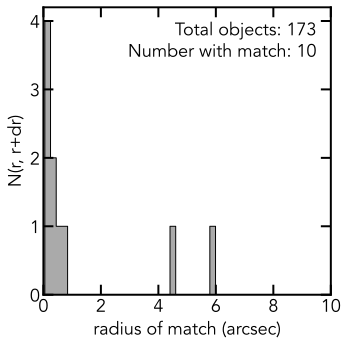

In [80]:
# crossmatch catalogs
max_radius = 10. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(p3CRR_NEDX,SDSS_galaxies_emission_lineX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (p3CRR_NEDX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()


# def dowanload_wise

pip install astroquery

In [111]:
from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_64380/2306530800.py:2: DeprecationWarning: the ``irsa`` module has been moved to astroquery.ipac.irsa, please update your imports.
  from astroquery.irsa import Irsa


In [112]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

def download_wise_withname(name,wisedata_path):

    #print(i)
    search_name=name.replace(' ','') 
    save_name=name.strip().replace(' ','') 
   
    if not os.path.exists('%s/wise_%s_mep.csv'%(wisedata_path,save_name)):
        print(search_name)
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120
            table_wise_mep=Irsa.query_region(search_name,catalog='allwise_p3as_mep',spatial='Cone',radius=10*u.arcsec,)
            table_wise_mep.write('%s/wise_%s_mep.csv'%(wisedata_path,save_name), format='csv')
            time.sleep(10+np.random.randint(5,10))
        except Exception:
            print(name)
            #continue
            #raise             
    
    if not os.path.exists('%s/wise_%s_neo.csv'%(wisedata_path,save_name)):
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120

            table_wise_neo=Irsa.query_region(search_name,catalog='neowiser_p1bs_psd',spatial='Cone',radius=10*u.arcsec,)  
            table_wise_neo.write('%s/wise_%s_neo.csv'%(wisedata_path,save_name), format='csv')       
            time.sleep(10+np.random.randint(5,10))   
        except Exception:
            #continue
            print(name)
            #raise                

# def download_wise_withradec

In [133]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

def download_wise_withradec(radeg,decdeg,wisedata_path):

    #print(i)
    #search_name=name.replace(' ','') 
    #save_name=name.strip().replace(' ','') 
    save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    name=save_name
    
    if not os.path.exists('%s/wise_%s_mep.csv'%(wisedata_path,save_name)):
        #print(search_name)
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120
            table_wise_mep=Irsa.query_region(coord.SkyCoord(radeg,
                             decdeg, unit=(u.deg,u.deg),frame='icrs'),
                            catalog='allwise_p3as_mep',
                            spatial='Cone',radius=10*u.arcsec,)
            
            
                           
            table_wise_mep.write('%s/wise_%s_mep.csv'%(wisedata_path,save_name), format='csv')
            time.sleep(10+np.random.randint(5,10))
        except Exception:
            print(name,'mep')
            #continue
            #raise             
    
    if not os.path.exists('%s/wise_%s_neo.csv'%(wisedata_path,save_name)):
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120

            table_wise_neo=Irsa.query_region(coord.SkyCoord(radeg,
                             decdeg, unit=(u.deg,u.deg),frame='icrs'),
                             catalog='neowiser_p1bs_psd',spatial='Cone',radius=10*u.arcsec,)  
            table_wise_neo.write('%s/wise_%s_neo.csv'%(wisedata_path,save_name), format='csv')       
            time.sleep(10+np.random.randint(5,10))   
        except Exception:
            #continue
            print(name,'neo')
            #raise                

In [161]:
wisedata_path_GGSM='%s/FadingGalaxy_wisedata/FadingGalaxy_GGSM_wisedata'%Surveyfits_root
if not os.path.exists(wisedata_path_GGSM):
    os.mkdir(wisedata_path_GGSM)

wiseplot_path_GGSM='%s/FadingGalaxy_wisedata/FadingGalaxy_GGSM_wiseplot'%Surveyfits_root
if not os.path.exists(wiseplot_path_GGSM):
    os.mkdir(wiseplot_path_GGSM)
    
wise_rebin_plot_path_GGSM='%s/FadingGalaxy_wisedata/FadingGalaxy_GGSM_wiseplot_rebin'%Surveyfits_root
if not os.path.exists(wise_rebin_plot_path_GGSM):
    os.mkdir(wise_rebin_plot_path_GGSM)
    
wisedata_path_TGSS='%s/FadingGalaxy_wisedata/FadingGalaxy_TGSS_wisedata'%Surveyfits_root
if not os.path.exists(wisedata_path_TGSS):
    os.mkdir(wisedata_path_TGSS)

wiseplot_path_TGSS='%s/FadingGalaxy_wisedata/FadingGalaxy_TGSS_wiseplot'%Surveyfits_root
if not os.path.exists(wiseplot_path_TGSS):
    os.mkdir(wiseplot_path_TGSS)
    
wise_rebin_plot_path_TGSS='%s/FadingGalaxy_wisedata/FadingGalaxy_TGSS_wiseplot_rebin'%Surveyfits_root
if not os.path.exists(wise_rebin_plot_path_TGSS):
    os.mkdir(wise_rebin_plot_path_TGSS)

wisedata_path_LoTSS='%s/FadingGalaxy_wisedata/FadingGalaxy_LoTSS_wisedata'%Surveyfits_root
if not os.path.exists(wisedata_path_LoTSS):
    os.mkdir(wisedata_path_LoTSS)

wiseplot_path_LoTSS='%s/FadingGalaxy_wisedata/FadingGalaxy_LoTSS_wiseplot'%Surveyfits_root
if not os.path.exists(wiseplot_path_LoTSS):
    os.mkdir(wiseplot_path_LoTSS)
    
wise_rebin_plot_path_LoTSS='%s/FadingGalaxy_wisedata/FadingGalaxy_LoTSS_wiseplot_rebin'%Surveyfits_root
if not os.path.exists(wise_rebin_plot_path_LoTSS):
    os.mkdir(wise_rebin_plot_path_LoTSS)
    

In [186]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing_radec=pd.read_csv('%s/RG_OIII_match_LoTSS_selectsnrgt5_fadeing.csv'%Surveyfits_root)
print(len(RG_OIII_match_LoTSS_selectsnrgt5_fadeing))
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_LoTSS_selectsnrgt5_fadeing_radec['RAdeg'],RG_OIII_match_LoTSS_selectsnrgt5_fadeing['DEdeg'])):
    download_wise_withradec(radeg,decdeg,wisedata_path_LoTSS) 
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)

30


In [187]:
RG_OIII_match_TGSS_selectsnrgt5_fadeing_radec=pd.read_csv('%s/RG_OIII_match_TGSS_selectsnrgt5_fadeing.csv'%Surveyfits_root)
print(len(RG_OIII_match_TGSS_selectsnrgt5_fadeing))
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_TGSS_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_TGSS_selectsnrgt5_fadeing['DEdeg'])):
    download_wise_withradec(radeg,decdeg,wisedata_path_TGSS)
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name,wisedata_path_TGSS)

21


In [188]:
RG_OIII_match_GGSM_selectsnrgt5_fadeing_radec=pd.read_csv('%s/RG_OIII_match_GGSM_selectsnrgt5_fadeing.csv'%Surveyfits_root)
print(len(RG_OIII_match_GGSM_selectsnrgt5_fadeing))
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_GGSM_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_GGSM_selectsnrgt5_fadeing['DEdeg'])):
    download_wise_withradec(radeg,decdeg,wisedata_path_GGSM)
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)


7


# RG_OIII_match_Radio_selectsnrgt5_fadeing_all

In [219]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing['Radio_Ins']='LOTSS'

In [220]:
RG_OIII_match_TGSS_selectsnrgt5_fadeing['Radio_Ins']='TGSS'

In [221]:
RG_OIII_match_GGSM_selectsnrgt5_fadeing['Radio_Ins']='GGSM'

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all

In [362]:
from astropy.table import Column, Table, vstack
RG_OIII_match_Radio_selectsnrgt5_fadeing_all=vstack([RG_OIII_match_LoTSS_selectsnrgt5_fadeing,RG_OIII_match_TGSS_selectsnrgt5_fadeing,RG_OIII_match_GGSM_selectsnrgt5_fadeing])

In [347]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all.colnames

['Plate',
 'MJD',
 'Fiber',
 'RAhour',
 'DEdeg',
 'z',
 'SNVSS',
 'RCl',
 'SFIRST',
 'Offset',
 'A',
 'M',
 'L',
 'H',
 'RAdeg',
 'z_',
 'ra_',
 'dec_',
 'h_alpha_flux',
 'h_alpha_flux_err',
 'h_beta_flux',
 'h_beta_flux_err',
 'oiii_5007_flux',
 'oiii_5007_flux_err',
 'F200MHz',
 'F200MHz_err',
 'Dcm',
 'L200MHz',
 'L200MHz_err',
 'logL200MHz',
 'h_alpha_Lum',
 'h_alpha_Lum_err',
 'h_beta_Lum',
 'h_beta_Lum_err',
 'oiii_5007_Lum',
 'oiii_5007_Lum_err',
 'OIII_snr',
 'fading1dex',
 'Radio_Ins']

In [292]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all[RG_OIII_match_Radio_selectsnrgt5_fadeing_all['z']>0.4]

Plate,MJD,Fiber,RAhour,DEdeg,z,SNVSS,RCl,SFIRST,Offset,A,M,L,H,RAdeg,z_,ra_,dec_,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,F200MHz,F200MHz_err,Dcm,L200MHz,L200MHz_err,logL200MHz,h_alpha_Lum,h_alpha_Lum_err,h_beta_Lum,h_beta_Lum_err,oiii_5007_Lum,oiii_5007_Lum_err,OIII_snr,fading1dex,Radio_Ins
,,,h,deg,,Jy,,Jy,arcsec,,,,,h,,,,,,,,,,mJy,mJy,,,,,,,,,,,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str5
1045,52725,330,14.189033,52.20276,0.46169,22.7203,1,22.1711,0.84,1,0,0,1,212.835495,0.4616873,212.8355,52.202764,0.0,-0.7657771,25.00137,2.751543,104.9389,4.599009,81275.535,108.589,8.024952490493295e+27,6.577405859814776e+35,8.787809577770562e+32,35.81805464089221,0.0,-6.197223783087943e+39,2.0232922187641994e+41,2.2267481907971845e+40,8.492417008174929e+41,3.7218516920178857e+40,22.817720078390803,1,LOTSS
1045,52725,330,14.189033,52.20276,0.46169,22.7203,1,22.1711,0.84,1,0,0,1,212.835495,0.4616873,212.8355,52.202764,0.0,-0.7657771,25.00137,2.751543,104.9389,4.599009,100434.7,10043.8,8.024952490493295e+27,8.127904470991658e+35,8.12817153092965e+34,35.90997859061344,0.0,-6.197223783087943e+39,2.0232922187641994e+41,2.2267481907971845e+40,8.492417008174929e+41,3.7218516920178857e+40,22.817720078390803,1,TGSS


Text(0, 0.5, 'N')

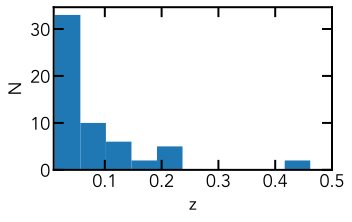

In [296]:
fig = plt.figure(figsize=(5,3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

set_ax_tick(ax)
ax.set_xlim(0.01,0.5)

plt.hist(RG_OIII_match_Radio_selectsnrgt5_fadeing_all['z'])

plt.xlabel('z')
plt.ylabel('N')

In [224]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all

Plate,MJD,Fiber,RAhour,DEdeg,z,SNVSS,RCl,SFIRST,Offset,A,M,L,H,RAdeg,z_,ra_,dec_,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,F200MHz,F200MHz_err,Dcm,L200MHz,L200MHz_err,logL200MHz,h_alpha_Lum,h_alpha_Lum_err,h_beta_Lum,h_beta_Lum_err,oiii_5007_Lum,oiii_5007_Lum_err,OIII_snr,fading1dex,Radio_Ins
,,,h,deg,,Jy,,Jy,arcsec,,,,,h,,,,,,,,,,mJy,mJy,,,,,,,,,,,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str5
349,51699,169,16.979768,62.94017,0.10627,0.258,4,0.0,--,1,1,1,0,254.69652,0.1062736,254.69652,62.940165,22.96743,1.976785,8.895367,1.681109,28.44237,1.834459,1037.419,3.104,1.5193474904559407e+27,3.0093887105847383e+32,9.004213878534157e+29,32.47847828742734,6.662488787379567e+39,5.734341150733939e+38,2.5804055088935167e+39,4.876631761961559e+38,8.250682432100631e+39,5.321475898003187e+38,15.504500236854572,1,LOTSS
443,51873,94,8.4971858,48.77999,0.02402,0.0079,1,0.0054,5.13,0,1,0,0,127.45778700000001,0.02401523,127.45779,48.779989,162.3551,1.374989,30.59822,0.7585712,5.145088,0.6204925,40.963,0.986,3.234625553726086e+26,5.3857928552878235e+29,1.2963874118872626e+28,29.731249645856877,2.1346359827149868e+39,1.8078280234112123e+37,4.0230372448435176e+38,9.973652684586361e+36,6.764733586462691e+37,8.158201482459001e+36,8.291942287779467,1,LOTSS
620,52375,453,15.984158,51.30468,0.01251,0.0156,2,0.0172,1.01,0,0,0,0,239.76237,0.01250561,239.76238,51.304677,253.9272,5.730159,47.07793,2.920041,21.95732,3.170865,81.081,1.089,1.6696470941690368e+26,2.840392337030598e+29,3.814934762800559e+27,29.45337833231433,8.89546099633251e+38,2.0073629720362248e+37,1.6492124124673216e+38,1.0229353461618831e+37,7.691987453253991e+37,1.1108028573597424e+37,6.924709818929535,1,LOTSS
624,52377,376,16.261449,47.18661,0.19863,0.625,4,0.0981,0.24,1,1,1,0,243.92173499999998,0.1986253,243.92174,47.18661,97.55244,6.908607,60.54595,5.924488,23.22171,3.745297,871.039,35.838,3.014380014837057e+27,9.945885797013173e+32,4.09213198482913e+31,32.99764346816669,1.1138943577267835e+41,7.888534983903794e+39,6.913388541404801e+40,6.764826954220761e+39,2.6515514881808824e+40,4.276535980351746e+39,6.200231917522163,1,LOTSS
817,52381,5,16.696016,39.64363,0.03015,0.0103,3,0.0,--,0,1,0,0,250.44024000000002,0.03014824,250.44024,39.643634,112.3107,1.304704,25.40169,0.5860996,8.918985,0.4744322,67.503,0.766,4.079255047796875e+26,1.4115447713145326e+30,1.6017707284519682e+28,30.14969465763454,2.3485116416703712e+39,2.7282463139610923e+37,5.31170802809544e+38,1.2255837901271635e+37,1.865035130613861e+38,9.920778206201956e+36,18.799282595068377,1,LOTSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,52146,194,0.5266587,-10.50482,0.01195,0.0181,1,0.011,6.87,0,1,0,0,7.8998805,0.01195358,7.8998815,-10.504818,203.6205,2.317034,48.79432,1.219951,17.80119,1.03452,99.16669749194809,7.933335799355847,1.594206947785439e+26,3.1671243069495053e+29,2.533699445559604e+28,29.500665109397417,6.503104885544607e+38,7.399999079352503e+36,1.558362644128793e+38,3.896203627937771e+36,5.685233346225345e+37,3.303985633172302e+36,17.207197540888526,1,GGSM
1444,53054,96,11.727666,46.35569,0.11603,0.8634,2,0.0,--,1,1,1,0,175.91499,0.1160252,175.91499,46.355687,200.4729,6.383862,58.52781,3.922552,33.83943,3.991704,4690.993193604899,375.27945548839193,1.6699731115719102e+27,1.6439690004244278e+33,1.315175200339542e+32,33.21589362398777,7.025617378308746e+40,2.2372386396328298e+39,2.0511201217239458e+40,1.3746670746280285e+39,1.1859103523721278e+40,1.3989015468656632e+39,8.477439709958453,1,GGSM


In [314]:
Sources_radec=[]

for index, (ra_,dec_) in enumerate(zip(RG_OIII_match_Radio_selectsnrgt5_fadeing_all['RAdeg'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all['DEdeg'])):
    if (ra_,dec_) not in Sources_radec:
        Sources_radec.append((ra_,dec_))
        

In [315]:
len(Sources_radec)

45

In [317]:
Sources_radec

[(254.69652, 62.94017),
 (127.45778700000001, 48.77999),
 (239.76237, 51.30468),
 (243.92173499999998, 47.18661),
 (250.44024000000002, 39.64363),
 (251.61841499999997, 38.52111),
 (126.8264085, 37.78126),
 (118.846947, 26.74094),
 (193.657365, 53.08999),
 (120.348717, 32.8838),
 (119.80439700000001, 32.91468),
 (148.20486449999999, 51.88475),
 (132.1778715, 37.21703),
 (168.590655, 58.38881),
 (171.82998, 59.62666),
 (212.95598999999999, 52.8167),
 (212.835495, 52.20276),
 (244.41891, 35.00421),
 (254.75421, 32.49423),
 (239.250735, 41.51975),
 (222.29826, 38.4139),
 (155.65587, 38.57916),
 (157.548675, 43.36251),
 (175.91499, 46.35569),
 (196.44408, 46.46178),
 (135.8112645, 30.59134),
 (217.83852, 35.62303),
 (201.51, 36.79981),
 (208.074525, 31.44625),
 (198.76463999999999, 24.61884),
 (119.617119, 37.78657),
 (7.8998805, -10.50482),
 (10.4602695, -9.30315),
 (168.46911, 4.29081),
 (179.10861, 3.76679),
 (205.917495, 3.896),
 (7.2140895, 0.65214),
 (175.11558, 12.05231),
 (212.0681

In [490]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all[['RAdeg','DEdeg','Plate','MJD','Fiber','Radio_Ins']].to_pandas().to_csv('%s/RG_OIII_match_ALL_selectsnrgt5_fadeing_radec.csv'%Surveyfits_root,
                                                            float_format='%.5f',index=False, sep=',') #delimiter=' ')#sep='\s')


In [308]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all[['RAdeg','DEdeg']]

RAdeg,DEdeg
h,deg
float64,float64
254.69652,62.94017
127.45778700000001,48.77999
239.76237,51.30468
243.92173499999998,47.18661
250.44024000000002,39.64363
...,...
7.8998805,-10.50482
175.91499,46.35569


## IRSA_TABLE

In [290]:
with open('%s/RG_OIII_match_ALL_selectsnrgt5_fadeing.tbl'%Surveyfits_root,'w+') as f:
    f.write("\catalog = 'Sample Catalog ' \n")
    f.write("\ A sample table comment  \n" )
    f.write("|    ra      |    dec        | "+'\n')
    f.write("|    double  |    double     | "+'\n')
    f.write("|    deg     |    deg        | "+'\n')
    for i,(ra_,dec_) in enumerate(zip(RG_OIII_match_Radio_selectsnrgt5_fadeing_all['RAdeg'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all['DEdeg'])):
        f.write('  {0:14} {1:14} \n'.format('%.6f'%ra_,'%.6f'%dec_))

In [ ]:
\catalog = 'Sample Catalog'
\ A sample table comment
|   ra      |    dec    |
|   double  |    double | 
|   deg     |    deg    | 
|   null    |    null   | 

# Fadeing_allX

In [270]:
Fadeing_allX=np.empty((len(RG_OIII_match_Radio_selectsnrgt5_fadeing_all), 2), dtype=np.float64)
Fadeing_allX[:, 0] = RG_OIII_match_Radio_selectsnrgt5_fadeing_all['RAdeg']
Fadeing_allX[:, 1] = RG_OIII_match_Radio_selectsnrgt5_fadeing_all['DEdeg']

In [273]:
Fadeing_wisedata=pd.read_csv('%s/Fading_RG_WISEdata.csv'%Surveyfits_root)
Fadeing_wisedata_Table= Table.read('%s/Fading_RG_WISEdata.csv'%Surveyfits_root)

## Fadeing_wisedata_Table

In [434]:
Fadeing_wisedata_Table

cntr_01,dist_x,pang_x,ra_01,dec_01,designation,ra,dec,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,w2sigmpro,w2snr,w2rchi2,w3mpro,w3sigmpro,w3snr,w3rchi2,w4mpro,w4sigmpro,w4snr,w4rchi2,nb,na,w1sat,w2sat,w3sat,w4sat,pmra,sigpmra,pmdec,sigpmdec,cc_flags,ext_flg,var_flg,ph_qual,moon_lev,w1nm,w1m,w2nm,w2m,w3nm,w3m,w4nm,w4m
int64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,str5,float64,float64,int64,int64,float64,float64,float64,float64,str5,str4,str5,str4,str4,int64,str4,str4,int64,int64,int64,int64,int64,int64,int64,int64,int64
1,0.10223,-31.160858,254.69652,62.94017,J165847.15+625624.6,254.6964877,62.9401943,0.0446,0.0457,-0.0067,13.673,0.024,45.1,3.958,13.487,0.026,41.5,1.249,12.91,0.324,3.3,0.8803,9.634,null,0.7,0.9954,1,0,0.0,0.0,0.0,0.0,119,41,-70,42,0000,1,21nn,AABU,0,93,93,93,93,1,75,0,75
2,5.632209,44.487987,127.457787,48.77999,J082950.26+484651.9,127.4594508,48.7811061,0.0325,0.0318,0.0028,11.47,0.023,46.9,52.18,11.321,0.021,52.2,20.56,7.323,0.017,63.7,16.75,5.527,0.041,26.5,2.156,1,0,0.0,0.0,0.0,0.0,-690,37,-481,37,0000,5,3211,AAAA,0,27,27,27,27,14,14,14,14
3,0.848195,177.581969,239.76237,51.30468,J155902.97+511816.0,239.7623859,51.3044446,0.0294,0.0292,-0.0054,10.573,0.023,48.1,81.82,10.423,0.02,54.5,42.18,6.845,0.014,78.8,47.37,4.987,0.025,43.3,11.77,1,0,0.0,0.0,0.0,0.003,198,23,150,23,0000,5,3331,AAAA,0,108,108,108,108,78,78,78,78
4,0.056162,0.499204,243.921735,47.18661,J161541.21+471111.8,243.9217352,47.1866256,0.0383,0.038,-0.0066,13.05,0.023,47.0,1.555,12.3,0.022,50.2,1.103,9.987,0.037,29.4,0.936,7.663,0.089,12.2,1.004,1,0,0.0,0.0,0.0,0.0,-7,40,-27,42,hho0,0,211n,AAAA,0,59,59,59,59,52,52,14,53
5,4.705306,-100.638277,250.44024,39.64363,J164145.25+393836.1,250.4385718,39.6433887,0.0295,0.0286,-0.0013,10.925,0.065,16.6,8.739,11.184,0.02,55.0,25.27,6.749,0.015,71.9,35.32,4.847,0.027,40.1,4.976,1,0,0.017,0.0,0.0,0.0,-402,30,-292,30,0h00,5,3210,AAAA,0,56,56,56,56,18,18,18,18
6,0.312039,141.67597,251.618415,38.52111,J164628.43+383115.7,251.6184837,38.521042,0.0449,0.0435,-0.0076,13.33,0.158,6.9,5.117,13.197,0.026,41.4,0.9094,10.527,0.068,15.9,1.046,8.734,null,1.2,1.003,1,0,0.017,0.002,0.0,0.0,-54,150,62,109,0000,1,000n,BAAU,0,43,43,55,55,17,18,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,6.381894,-140.262083,7.899881,-10.50482,J003135.69-103022.2,7.8987284,-10.5061832,0.0307,0.0308,0.0047,10.987,0.023,46.6,78.07,10.768,0.021,51.4,35.27,6.527,0.015,72.5,41.05,4.591,0.028,38.6,8.178,1,0,0.0,0.0,0.0,0.0,204,39,-225,38,0000,5,4310,AAAA,0,25,25,25,25,13,13,13,13
54,0.515286,-115.490529,175.91499,46.35569,J114339.55+462120.2,175.9148028,46.3556284,0.0441,0.0439,-0.0082,12.848,0.024,44.6,31.69,12.697,0.025,43.4,7.202,11.831,0.198,5.5,0.9532,8.79,null,0.9,0.8739,1,0,0.0,0.0,0.0,0.0,60,56,124,58,0000,5,00nn,AABU,0,37,37,37,37,0,22,0,22


In [433]:
for index,ra_ in enumerate(Fadeing_wisedata_Table['ra']):
    print(Fadeing_wisedata_Table['ra'][index],Fadeing_wisedata_Table['dec'][index],RG_OIII_match_Radio_selectsnrgt5_fadeing_all['RAdeg'][index],RG_OIII_match_Radio_selectsnrgt5_fadeing_all['DEdeg'][index])

254.6964877 62.9401943 254.69652 62.94017
127.4594508 48.7811061 127.45778700000001 48.77999
239.7623859 51.3044446 239.76237 51.30468
243.9217352 47.1866256 243.92173499999998 47.18661
250.4385718 39.6433887 250.44024000000002 39.64363
251.6184837 38.521042 251.61841499999997 38.52111
126.826519 37.7811991 126.8264085 37.78126
118.8469155 26.7425803 118.846947 26.74094
193.6573205 53.0899982 193.657365 53.08999
120.3486786 32.883998 120.348717 32.8838
119.8043209 32.9146653 119.80439700000001 32.91468
148.2048824 51.8847444 148.20486449999999 51.88475
132.1782093 37.2185797 132.1778715 37.21703
168.5910557 58.3887332 168.590655 58.38881
171.8300063 59.627052 171.82998 59.62666
212.9560243 52.8167484 212.95598999999999 52.8167
212.8353389 52.2029556 212.835495 52.20276
244.4189309 35.004273 244.41891 35.00421
254.7542072 32.4942765 254.75421 32.49423
239.250723 41.5197778 239.250735 41.51975
222.2981427 38.413667 222.29826 38.4139
155.6559517 38.5791617 155.65587 38.57916
157.5472747 4

# def WISEmagtoLum

[AB magnitude System](https://lweb.cfa.harvard.edu/~dfabricant/huchra/ay145/mags.html)

This magnitude system is defined such that, when monochromatic flux f is measured in erg sec^-1 cm^-2 Hz^-1,  

m(AB) = -2.5 log(f) - 48.60

$m(AB)= m(vega)+ \Delta M$	(Eq. 4)



[Table 3 - Conversion to the AB system](https://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#conv2flux)  
(mAB = mVega + Δm)  
Band	magnitude offset (Δm)   
W1	2.699  
W2	3.339  
W3	5.174  
W4	6.620  


In [457]:
def W1mag_to_Lum(w1,d_cm):
    Lum=(-48.6-w1-2.699)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(3.4*u.um)).to(u.Hz).value)
    return Lum #logLum

def W2mag_to_Lum(w2,d_cm):
    Lum=(-48.6-w2-3.339)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(4.6*u.um)).to(u.Hz).value)
    return Lum #logLum
 

def W3mag_to_Lum(w3,d_cm):
    Lum=(-48.6-w3-5.174)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(12*u.um)).to(u.Hz).value)
    return Lum #logLum

def W4mag_to_Lum(w4,d_cm):
    Lum=(-48.6-w4-6.620)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(22*u.um)).to(u.Hz).value)
    return Lum #logLum

In [363]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all


Plate,MJD,Fiber,RAhour,DEdeg,z,SNVSS,RCl,SFIRST,Offset,A,M,L,H,RAdeg,z_,ra_,dec_,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,F200MHz,F200MHz_err,Dcm,L200MHz,L200MHz_err,logL200MHz,h_alpha_Lum,h_alpha_Lum_err,h_beta_Lum,h_beta_Lum_err,oiii_5007_Lum,oiii_5007_Lum_err,OIII_snr,fading1dex,Radio_Ins
,,,h,deg,,Jy,,Jy,arcsec,,,,,h,,,,,,,,,,mJy,mJy,,,,,,,,,,,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str5
349,51699,169,16.979768,62.94017,0.10627,0.258,4,0.0,--,1,1,1,0,254.69652,0.1062736,254.69652,62.940165,22.96743,1.976785,8.895367,1.681109,28.44237,1.834459,1037.419,3.104,1.5193474904559407e+27,3.0093887105847383e+32,9.004213878534157e+29,32.47847828742734,6.662488787379567e+39,5.734341150733939e+38,2.5804055088935167e+39,4.876631761961559e+38,8.250682432100631e+39,5.321475898003187e+38,15.504500236854572,1,LOTSS
443,51873,94,8.4971858,48.77999,0.02402,0.0079,1,0.0054,5.13,0,1,0,0,127.45778700000001,0.02401523,127.45779,48.779989,162.3551,1.374989,30.59822,0.7585712,5.145088,0.6204925,40.963,0.986,3.234625553726086e+26,5.3857928552878235e+29,1.2963874118872626e+28,29.731249645856877,2.1346359827149868e+39,1.8078280234112123e+37,4.0230372448435176e+38,9.973652684586361e+36,6.764733586462691e+37,8.158201482459001e+36,8.291942287779467,1,LOTSS
620,52375,453,15.984158,51.30468,0.01251,0.0156,2,0.0172,1.01,0,0,0,0,239.76237,0.01250561,239.76238,51.304677,253.9272,5.730159,47.07793,2.920041,21.95732,3.170865,81.081,1.089,1.6696470941690368e+26,2.840392337030598e+29,3.814934762800559e+27,29.45337833231433,8.89546099633251e+38,2.0073629720362248e+37,1.6492124124673216e+38,1.0229353461618831e+37,7.691987453253991e+37,1.1108028573597424e+37,6.924709818929535,1,LOTSS
624,52377,376,16.261449,47.18661,0.19863,0.625,4,0.0981,0.24,1,1,1,0,243.92173499999998,0.1986253,243.92174,47.18661,97.55244,6.908607,60.54595,5.924488,23.22171,3.745297,871.039,35.838,3.014380014837057e+27,9.945885797013173e+32,4.09213198482913e+31,32.99764346816669,1.1138943577267835e+41,7.888534983903794e+39,6.913388541404801e+40,6.764826954220761e+39,2.6515514881808824e+40,4.276535980351746e+39,6.200231917522163,1,LOTSS
817,52381,5,16.696016,39.64363,0.03015,0.0103,3,0.0,--,0,1,0,0,250.44024000000002,0.03014824,250.44024,39.643634,112.3107,1.304704,25.40169,0.5860996,8.918985,0.4744322,67.503,0.766,4.079255047796875e+26,1.4115447713145326e+30,1.6017707284519682e+28,30.14969465763454,2.3485116416703712e+39,2.7282463139610923e+37,5.31170802809544e+38,1.2255837901271635e+37,1.865035130613861e+38,9.920778206201956e+36,18.799282595068377,1,LOTSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,52146,194,0.5266587,-10.50482,0.01195,0.0181,1,0.011,6.87,0,1,0,0,7.8998805,0.01195358,7.8998815,-10.504818,203.6205,2.317034,48.79432,1.219951,17.80119,1.03452,99.16669749194809,7.933335799355847,1.594206947785439e+26,3.1671243069495053e+29,2.533699445559604e+28,29.500665109397417,6.503104885544607e+38,7.399999079352503e+36,1.558362644128793e+38,3.896203627937771e+36,5.685233346225345e+37,3.303985633172302e+36,17.207197540888526,1,GGSM
1444,53054,96,11.727666,46.35569,0.11603,0.8634,2,0.0,--,1,1,1,0,175.91499,0.1160252,175.91499,46.355687,200.4729,6.383862,58.52781,3.922552,33.83943,3.991704,4690.993193604899,375.27945548839193,1.6699731115719102e+27,1.6439690004244278e+33,1.315175200339542e+32,33.21589362398777,7.025617378308746e+40,2.2372386396328298e+39,2.0511201217239458e+40,1.3746670746280285e+39,1.1859103523721278e+40,1.3989015468656632e+39,8.477439709958453,1,GGSM


In [364]:
Fadeing_wisedata_Table.colnames

['cntr_01',
 'dist_x',
 'pang_x',
 'ra_01',
 'dec_01',
 'designation',
 'ra',
 'dec',
 'sigra',
 'sigdec',
 'sigradec',
 'w1mpro',
 'w1sigmpro',
 'w1snr',
 'w1rchi2',
 'w2mpro',
 'w2sigmpro',
 'w2snr',
 'w2rchi2',
 'w3mpro',
 'w3sigmpro',
 'w3snr',
 'w3rchi2',
 'w4mpro',
 'w4sigmpro',
 'w4snr',
 'w4rchi2',
 'nb',
 'na',
 'w1sat',
 'w2sat',
 'w3sat',
 'w4sat',
 'pmra',
 'sigpmra',
 'pmdec',
 'sigpmdec',
 'cc_flags',
 'ext_flg',
 'var_flg',
 'ph_qual',
 'moon_lev',
 'w1nm',
 'w1m',
 'w2nm',
 'w2m',
 'w3nm',
 'w3m',
 'w4nm',
 'w4m']

In [435]:
labels_add=[
 'ra',
 'dec',
 'w1mpro',
 'w1sigmpro',
 'w2mpro',
 'w2sigmpro',
 'w3mpro',
 'w4mpro'  
]

RG_OIII_match_Radio_selectsnrgt5_fadeing_all.colnames

In [323]:
len(RG_OIII_match_Radio_selectsnrgt5_fadeing_all),len(Fadeing_wisedata_Table)

(58, 58)

## RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy

In [459]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy=RG_OIII_match_Radio_selectsnrgt5_fadeing_all.copy()

for label in labels_add:
    RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy[label+'_wise']=0

In [460]:
for label in labels_add:
    RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy[label+'_wise']=-0.0
    for index, (ra_,dec_) in enumerate(zip(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['RAdeg'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['DEdeg'])):
        #print(Fadeing_wisedata_Table[label][index])
        #if Fadeing_wisedata_Table[label][index]:
        RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy[label+'_wise'][index]=Fadeing_wisedata_Table[label][index]
        #else:
        #RG_OIII_match_Radio_selectsnrgt5_fadeing_all[label+'_wise'][index]=0
            


In [461]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all.colnames

['Plate',
 'MJD',
 'Fiber',
 'RAhour',
 'DEdeg',
 'z',
 'SNVSS',
 'RCl',
 'SFIRST',
 'Offset',
 'A',
 'M',
 'L',
 'H',
 'RAdeg',
 'z_',
 'ra_',
 'dec_',
 'h_alpha_flux',
 'h_alpha_flux_err',
 'h_beta_flux',
 'h_beta_flux_err',
 'oiii_5007_flux',
 'oiii_5007_flux_err',
 'F200MHz',
 'F200MHz_err',
 'Dcm',
 'L200MHz',
 'L200MHz_err',
 'logL200MHz',
 'h_alpha_Lum',
 'h_alpha_Lum_err',
 'h_beta_Lum',
 'h_beta_Lum_err',
 'oiii_5007_Lum',
 'oiii_5007_Lum_err',
 'OIII_snr',
 'fading1dex',
 'Radio_Ins']

In [462]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy.colnames

['Plate',
 'MJD',
 'Fiber',
 'RAhour',
 'DEdeg',
 'z',
 'SNVSS',
 'RCl',
 'SFIRST',
 'Offset',
 'A',
 'M',
 'L',
 'H',
 'RAdeg',
 'z_',
 'ra_',
 'dec_',
 'h_alpha_flux',
 'h_alpha_flux_err',
 'h_beta_flux',
 'h_beta_flux_err',
 'oiii_5007_flux',
 'oiii_5007_flux_err',
 'F200MHz',
 'F200MHz_err',
 'Dcm',
 'L200MHz',
 'L200MHz_err',
 'logL200MHz',
 'h_alpha_Lum',
 'h_alpha_Lum_err',
 'h_beta_Lum',
 'h_beta_Lum_err',
 'oiii_5007_Lum',
 'oiii_5007_Lum_err',
 'OIII_snr',
 'fading1dex',
 'Radio_Ins',
 'ra_wise',
 'dec_wise',
 'w1mpro_wise',
 'w1sigmpro_wise',
 'w2mpro_wise',
 'w2sigmpro_wise',
 'w3mpro_wise',
 'w4mpro_wise']

In [463]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy[['RAdeg','DEdeg','ra_wise','dec_wise']]

RAdeg,DEdeg,ra_wise,dec_wise
h,deg,,
float64,float64,float64,float64
254.69652,62.94017,254.6964877,62.9401943
127.45778700000001,48.77999,127.4594508,48.7811061
239.76237,51.30468,239.7623859,51.3044446
243.92173499999998,47.18661,243.9217352,47.1866256
250.44024000000002,39.64363,250.4385718,39.6433887
...,...,...,...
7.8998805,-10.50482,7.8987284,-10.5061832
175.91499,46.35569,175.9148028,46.3556284


In [464]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['logLw1']=W1mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['w1mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['Dcm'])

RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['logLw2']=W2mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['w2mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['Dcm'])


RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['logLw3']=W3mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['w3mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['Dcm'])

RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['logLw4']=W4mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['w4mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['Dcm'])



In [489]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy.to_pandas().to_csv('%s/RG_OIII_match_Radio_selectsnrgt5_fadeing_all.csv'%Surveyfits_root,index=False)



In [465]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy.colnames

['Plate',
 'MJD',
 'Fiber',
 'RAhour',
 'DEdeg',
 'z',
 'SNVSS',
 'RCl',
 'SFIRST',
 'Offset',
 'A',
 'M',
 'L',
 'H',
 'RAdeg',
 'z_',
 'ra_',
 'dec_',
 'h_alpha_flux',
 'h_alpha_flux_err',
 'h_beta_flux',
 'h_beta_flux_err',
 'oiii_5007_flux',
 'oiii_5007_flux_err',
 'F200MHz',
 'F200MHz_err',
 'Dcm',
 'L200MHz',
 'L200MHz_err',
 'logL200MHz',
 'h_alpha_Lum',
 'h_alpha_Lum_err',
 'h_beta_Lum',
 'h_beta_Lum_err',
 'oiii_5007_Lum',
 'oiii_5007_Lum_err',
 'OIII_snr',
 'fading1dex',
 'Radio_Ins',
 'ra_wise',
 'dec_wise',
 'w1mpro_wise',
 'w1sigmpro_wise',
 'w2mpro_wise',
 'w2sigmpro_wise',
 'w3mpro_wise',
 'w4mpro_wise',
 'logLw1',
 'logLw2',
 'logLw3',
 'logLw4']

oiii_5007_Lum logLw3


Text(0, 0.5, 'logLw3')

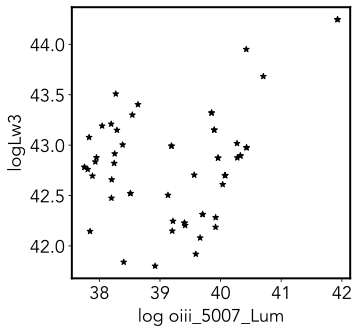

In [483]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw3'#logL

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i]),
                   plotdata[colum_ylabel][i],
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')

ax.set_xlabel('log '+colum_xlabel)
ax.set_ylabel(colum_ylabel)



oiii_5007_Lum logLw3


Text(0, 0.5, 'logLw3_based_Lbol')

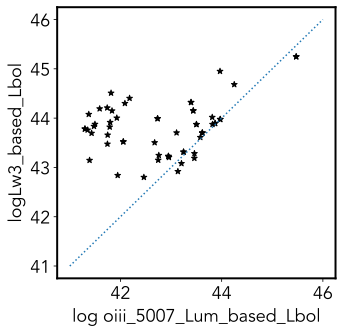

In [484]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw3'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i])+np.log10(3500),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel('log '+colum_xlabel+'_based_Lbol')
ax.set_ylabel(colum_ylabel+'_based_Lbol')



## OIII VS WISE LBol

oiii_5007_Lum logLw2
oiii_5007_Lum logLw2
oiii_5007_Lum logLw3
oiii_5007_Lum logLw4


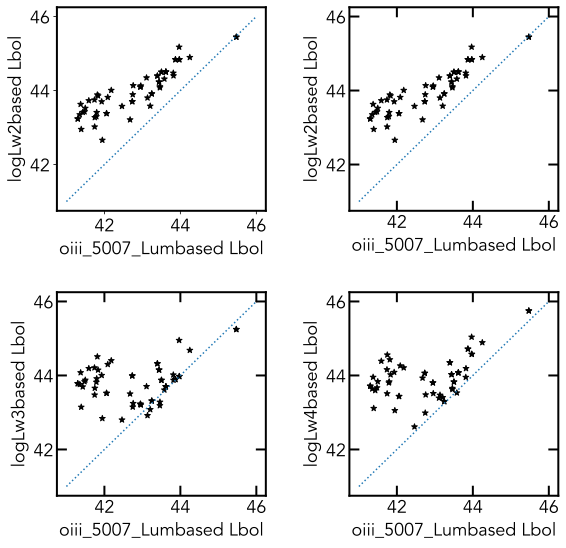

In [479]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
ax = fig.add_subplot(221)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw2'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i])+np.log10(3500),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
###########################################
ax = fig.add_subplot(222)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw2'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i])+np.log10(3500),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)

###########################################
ax = fig.add_subplot(223)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw3'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i])+np.log10(3500),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)


###########################################
ax = fig.add_subplot(224)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw4'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i])+np.log10(3500),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)
###########################################





###########################################

## WISE comparison

logLw1 logLw2
logLw1 logLw3
logLw1 logLw4
logLw2 logLw3
logLw2 logLw4
logLw3 logLw4


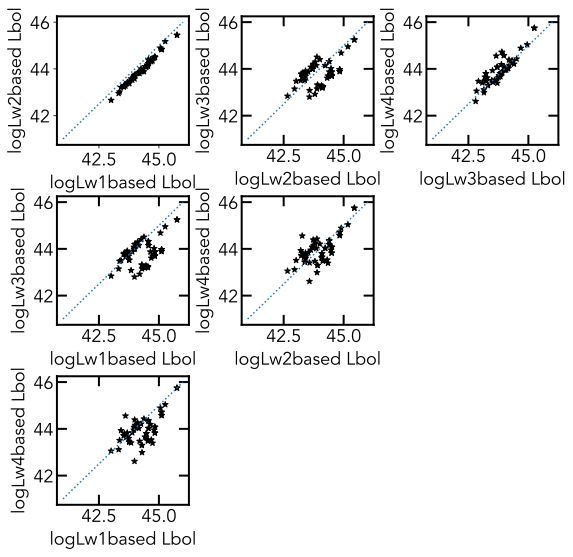

In [475]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
ax = fig.add_subplot(331)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw1'
colum_ylabel='logLw2'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
###########################################
ax = fig.add_subplot(334)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw1'
colum_ylabel='logLw3'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)

###########################################
ax = fig.add_subplot(337)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw1'
colum_ylabel='logLw4'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)


###########################################
ax = fig.add_subplot(332)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw2'
colum_ylabel='logLw3'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)
###########################################




ax = fig.add_subplot(335)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw2'
colum_ylabel='logLw4'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)
###########################################



ax = fig.add_subplot(333)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw3'
colum_ylabel='logLw4'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)
###########################################

oiii_5007_Lum logLw2


Text(0, 0.5, 'logLw2')

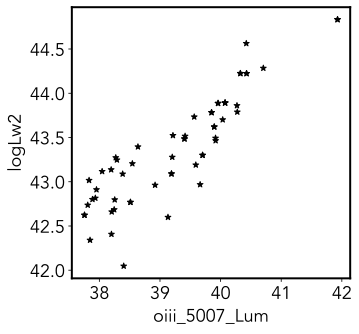

In [404]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw2'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i]),
                   plotdata[colum_ylabel][i],
                   color='black',marker='*',label='FRII')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')

ax.set_xlabel(colum_xlabel)
ax.set_ylabel(colum_ylabel)



L200MHz oiii_5007_Lum
RA DEC redshift Plate MJD Fiber
181.638945 22.26045 0.06506 2644 54210 279
167.60457 3.36078 0.02996 581 52356 49


Text(0, 0.5, 'oiii_5007_Lum')

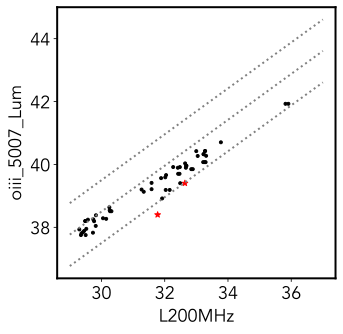

In [424]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='L200MHz'
colum_ylabel='oiii_5007_Lum'


print(colum_xlabel,colum_ylabel)

print('RA DEC redshift Plate MJD Fiber')
        
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        if 0.73*np.log10(plotdata[colum_xlabel][i])+16.6>np.log10(plotdata[colum_ylabel][i])+1:
            color='red'
            marker='*'
            print(plotdata['RAdeg'][i],plotdata['DEdeg'][i],plotdata['z'][i],plotdata['Plate'][i],plotdata['MJD'][i],plotdata['Fiber'][i])
        
        else:
            color='black'
            marker='.'
            
        ax.scatter(np.log10(plotdata[colum_xlabel][i]),
                   np.log10(plotdata[colum_ylabel][i]),
                   color=color,marker=marker)
              

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
log_L200=np.linspace(29,37,10)
y_log_L200=0.73*log_L200+16.6

ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

ax.set_xlabel(colum_xlabel)
ax.set_ylabel(colum_ylabel)



In [421]:
from astroquery.ipac.ned import Ned
import astropy.units as u
from astropy import coordinates

ra,dec=181.638945,22.26045
co = coordinates.SkyCoord(ra=ra, dec=dec, 
                          unit=(u.deg, u.deg), frame='icrs')

result_table = Ned.query_region(co, radius=2 * u.arcsec)
print(result_table[['Object Name','Redshift']])
print(result_table)

       Object Name         Redshift 
------------------------- ----------
                4C +22.33   0.065056
            [WH2015] 0616      0.065
WISEA J120633.44+221537.7         --
No.        Object Name            RA        DEC     ... Redshift Points Diameter Points Associations
                               degrees    degrees   ...                                             
--- ------------------------- ---------- ---------- ... --------------- --------------- ------------
  1                 4C +22.33  181.63895   22.26045 ...              14               6            0
  2             [WH2015] 0616  181.63895   22.26044 ...               1               0            0
  3 WISEA J120633.44+221537.7  181.63936   22.26048 ...               0               0            0


In [422]:
ra,dec=167.60457,3.36078
co = coordinates.SkyCoord(ra=ra, dec=dec, 
                          unit=(u.deg, u.deg), frame='icrs')

result_table = Ned.query_region(co, radius=2 * u.arcsec)
print(result_table[['Object Name','Redshift']])
print(result_table)

       Object Name         Redshift 
------------------------- ----------
WISEA J111025.08+032138.9   0.029987
No.        Object Name            RA        DEC     ... Redshift Points Diameter Points Associations
                               degrees    degrees   ...                                             
--- ------------------------- ---------- ---------- ... --------------- --------------- ------------
  1 WISEA J111025.08+032138.9  167.60458    3.36078 ...              10               4            0


In [ ]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4

colum_xlabel='h_alpha_Lum'
colum_ylabel='h_beta_Lum'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i]),
                   np.log10(plotdata[colum_ylabel][i]),
                   color='black',marker='*',label='FRII')


ax.set_xlabel(colum_xlabel)
ax.set_ylabel(colum_ylabel)



h_alpha_Lum h_beta_Lum


/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_64380/887981126.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(plotdata[colum_xlabel][i]),


Text(0, 0.5, 'h_beta_Lum')

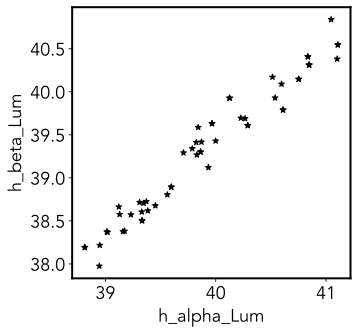

In [396]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4

colum_xlabel='h_alpha_Lum'
colum_ylabel='h_beta_Lum'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i]),
                   np.log10(plotdata[colum_ylabel][i]),
                   color='black',marker='*',label='FRII')


ax.set_xlabel(colum_xlabel)
ax.set_ylabel(colum_ylabel)

